# Анализ благотоворителей АиФ Доброе сердце

**Описание кейса:**
Благотворительный фонд АиФ Доброе сердце хочет лучше узнать своих благотворителей, чтобы максимально эффективно выстроить свою работу с ними.
У фонда есть «старожилы» - доноры, которые достаточно давно с фондом и одной
из задач будет изучение их поведения: активны ли они, делают ли пожертвования
и как реагируют на активность фонда?  

**Цель:**
Проанализировать поведение доноров и сделать рекомендации по их привлечению, удержанию, увеличению среднего чека.

**Задачи:**
1. Предобработка данных
2. Исследовательский анализ данных
3. Анализ поведения исторических и новых доноров
4. RFM-анализ
5. Выводы и рекомендации


У меня есть 3 датасета и один текстовый файл:
- - id_donor.csv

|Название столбца|Описание|
|:--|:--:|
|CustomerCustomFieldsRecurrent|Рекуррент|
|CustomerCustomFieldsVolunteer|Волонтер да/нет|
|CustomerSex|Пол|
|CustomerAreaIdsExternalId|Идентификатор географической зоны клиента|
|CustomerAreaName|Название географической зоны клиента|
|CustomerIanaTimeZone|Часовой пояс|
|CustomerTimeZoneSource|Источник информации о часовом поясе|
|CustomerIdsMindboxId|Идентификатор Mindbox|
|CustomerIsEmailInvalid|Адрес электронной почты невалиден|
|CustomerChangeDateTimeUtc|Дата регистрации/редактирования в формате yyyy-MM-dd HH:mm:ss.fff|
|CustomerCustomerSubscriptionsDobroaifIsSubscribed|Подписка|
|CustomerCustomerSubscriptionsDobroaifIsSubscribed|Подписка|
|CustomerCustomerSubscriptionsDobroaifSmsIsSubscribed|Подписка в точке контакта SMS|
|CustomerCustomerSubscriptionsDobroaifEmailIsSubscribed|Подписка в точке контакта Email|
|CustomerCustomerSubscriptionsDobroaifViberIsSubscribed|Подписка в точке контакта Viber|
|CustomerCustomerSubscriptionsDobroaifMobilePushIsSubscribed|Подписка в точке контакта MobilePush|
|CustomerCustomerSubscriptionsDobroaifWebPushIsSubscribed|Подписка в точке контакта WebPush|



- orders

|Название столбца|Описание|
|:--|:--:|
|OrderIdsMindboxId|Идентификатор Mindbox|                                  
|OrderFirstActionIdsMindboxId|Идентификатор Mindbox|
|OrderFirstActionDateTimeUtc| Дата и время оформления заказа по UTC|
|OrderFirstActionChannelIdsMindboxId| Идентификатор Mindbox|
|OrderFirstActionChannelIdsExternalId| Внешний идентификатор точки контакта|
|OrderFirstActionChannelName| Имя точки контакта|
|OrderAreaIdsExternalId| Идентификатор географической зоны клиента|
|OrderTransactionIdsExternalId| Идентификатор транзакции|
|OrderTotalPrice|Стоимость заказа|
|OrderIdsWebsiteID| Идентификатор заказа на сайте|
|OrderCustomFieldsNewyear|newyear|
|OrderCustomFieldsNextPayDate|Дата след. Списания|
|OrderCustomFieldsRecurrent|Регулярный да/нет|
|OrderCustomFieldsRepayment|Повторный рекуррент|
|OrderLineProductIdsWebsite|Id продукта в Сайт|
|OrderLineProductName|Техническое название продукта|
|OrderLineQuantity|Количество единиц продукта|
|OrderLineBasePricePerItem|Базовая цена продукта за единицу продукта|
|OrderLinePriceOfLine|Конечная цена|
|OrderLineStatusIdsExternalId|Идентификатор статуса позиции заказа|
|OrderCustomerIdsMindboxId|Идентификатор Mindbox|

- imports

|Название столбца|Описание|
|:--|:--:|
|CustomerActionIdsMindboxId|id действия|
|CustomerActionActionTemplateIdsSystemName|название действия|
|CustomerActionActionTemplateName|название действия|
|CustomerActionDateTimeUtc|дата и время действия|
|CustomerActionCreationDateTimeUtc|дата создания действия|
|CustomerActionBrandIdsSystemName|название системы|
|CustomerActionChannelIdsMindboxId|айди действия клиента|
|CustomerActionChannelName|название канала действия клиента|
|CustomerActionChannelIdsExternalId|внейшний id канала|
|CustomerActionChannelIdsSystemName|название канала действия|
|CustomerActionChannelUtmCampaign|наименование рекламной кампании|
|CustomerActionChannelUtmSource|наименование рекламного источника|
|CustomerActionChannelUtmMedium|тип трафика|
|CustomerActionChannelUtmContent|содержание рекламы|
|CustomerActionChannelUtmTerm|ключевое слово, с которого начинается реклама|
|CustomerActionCustomerIdsBackendID|Backend ID действия|
|CustomerActionCustomerIdsWebsiteID|Website ID действия|
|CustomerActionCustomerIdsMindboxId|id пользователя|  


- channels

|Название столбца|Описание|
|:--|:--:|
|user_action|действие пользователя|
|action_date|дата действия|
|channel_id|id канала|
|utm_campaign|наименование рекламной кампании|
|utm_source|наименование рекламного источника|
|utm_medium|тип трафика|
|user_id|id пользователя|
|action_time|время действия|
|channels_dict|название канала|


## Загрузка данных и подготовка их к анализу

### Загрузка данных

**Загружаю библиотеки:**

In [973]:
#pip install ydata_profiling

In [974]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
from ydata_profiling import ProfileReport

In [780]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/Мастерская/part_2/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Мастерская/part_2


In [781]:
#ищем доступные кодировки
from encodings.aliases import aliases
chosen_encodings = []

for v in aliases.values():
  try:
    test = pd.read_csv("id_donor.csv", encoding=v)
    if v not in chosen_encodings:
      chosen_encodings.append(v)
  except Exception as e:
    pass

In [782]:
#загружаю данные
id_donor = pd.read_csv("id_donor.csv", encoding="ptcp154", sep=';')
imports = pd.read_csv("import.csv", encoding="ptcp154", sep=';')
orders = pd.read_csv("order.csv", encoding="cp1251", sep=';')

<ipython-input-782-57099ca0b3fd>:4: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  orders = pd.read_csv("order.csv", encoding="cp1251", sep=';')


In [783]:
# загрузка pkl файла
channels = pd.read_pickle("channels.pkl")

In [784]:
# загрузка txt файла (словарь с раскодрировкой каналов привлечения)
file = open('channels_dict.txt', 'r', encoding='UTF-8')
channels_dict = file.read()

In [785]:
# меняю одинарные кавычки на двойные, чтобы с помощью библиотеки json, чтобы преобразовать str в dict
x = str(channels_dict).replace("'", '"')
result = json.loads(x)

In [786]:
# функция, которая преобразует ключи словаря с типом str в int
def get_int_key(dictionary):
    results = {}
    for key, val in dictionary.items():
        try:
            key = int(key)
        except:
            key = key
        results[key] = get_int_key(val) if isinstance(val, dict) else val
    return results

results = get_int_key(result)

In [787]:
# раскодируем столбец channel_id
channels['channel_id'] = channels['channel_id'].replace(results)

### Обзор и предобработка данных

#### Файл с информацией о донорах

In [788]:
def data_review(data):
    display(data.head(pd.set_option('display.max_columns', None)), data.info(), data.describe())

display(data_review(id_donor))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 16 columns):
 #   Column                                                                                              Non-Null Count  Dtype 
---  ------                                                                                              --------------  ----- 
 0   CustomerCustomFieldsRecurrent = Рекуррент                                                           5923 non-null   object
 1   CustomerCustomFieldsVolunteer =  Волонтер да/нет                                                    6 non-null      object
 2   CustomerSex = Пол                                                                                   18715 non-null  object
 3   CustomerAreaIdsExternalId = Идентификатор географической зоны клиента                               5044 non-null   object
 4   CustomerAreaName = Название географической зоны клиента                                             5044 non-null   ob

,CustomerCustomFieldsRecurrent = Рекуррент,CustomerCustomFieldsVolunteer = Волонтер да/нет,CustomerSex = Пол,CustomerAreaIdsExternalId = Идентификатор географической зоны клиента,CustomerAreaName = Название географической зоны клиента,CustomerIanaTimeZone = Часовой пояс,CustomerTimeZoneSource = Источник информации о часовом поясе,CustomerIdsMindboxId = Идентификатор Mindbox,CustomerIsEmailInvalid = Адрес электронной почты невалиден,CustomerChangeDateTimeUtc = Дата регистрации/редактирования в формате yyyy-MM-dd HH:mm:ss.fff,CustomerCustomerSubscriptionsDobroaifIsSubscribed = Подписка,CustomerCustomerSubscriptionsDobroaifSmsIsSubscribed = Подписка в точке контакта SMS,CustomerCustomerSubscriptionsDobroaifEmailIsSubscribed = Подписка в точке контакта Email,CustomerCustomerSubscriptionsDobroaifViberIsSubscribed = Подписка в точке контакта Viber,CustomerCustomerSubscriptionsDobroaifMobilePushIsSubscribed = Подписка в точке контакта MobilePush,CustomerCustomerSubscriptionsDobroaifWebPushIsSubscribed = Подписка в точке контакта WebPush
0,NaN,NaN,female,75,Ульяновская область,Europe/Samara,Определили в трекере,2734,False,21.05.2023 13:19,NaN,NaN,True,NaN,NaN,NaN
1,False,NaN,female,63,Санкт-Петербург и ЛО,Europe/Moscow,Определили в трекере,2847,False,24.12.2023 5:41,NaN,NaN,True,NaN,NaN,NaN
2,NaN,NaN,female,Москва и МО,Москва и МО,Europe/Moscow,Определили в трекере,2861,False,10.03.2023 8:16,NaN,True,True,NaN,NaN,NaN
3,NaN,NaN,female,60,Ростовская область,Europe/Moscow,Определили в трекере,3361,True,20.12.2022 9:36,NaN,NaN,False,NaN,NaN,NaN
4,False,NaN,male,31,Москва и МО,Europe/Moscow,Определили в трекере,4982,False,18.12.2023 19:43,NaN,NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,False,NaN,male,NaN,NaN,NaN,NaN,46782,False,18.03.2024 8:15,NaN,NaN,True,NaN,NaN,NaN
23816,False,NaN,female,NaN,NaN,NaN,NaN,46783,False,18.03.2024 8:15,NaN,NaN,True,NaN,NaN,NaN
23817,False,NaN,female,NaN,NaN,NaN,NaN,46784,False,18.03.2024 8:15,NaN,NaN,True,NaN,NaN,NaN
23818,False,NaN,female,NaN,NaN,Europe/Moscow,Определили в трекере,46785,False,18.03.2024 8:58,NaN,NaN,False,NaN,NaN,NaN


None

,CustomerIdsMindboxId = Идентификатор Mindbox
count,23820.000000
mean,32026.289840
std,9796.889488
min,2734.000000
25%,24322.750000
50%,33068.500000
75%,40504.250000
max,46786.000000


None

В данных есть пропуски, неправильные типы данных и слишком длинные названия столбцов.

**Переименую названия столбцов:**

In [789]:
id_donor = id_donor.rename(columns={'CustomerCustomFieldsRecurrent = Рекуррент':'is_recurrent',
                                    'CustomerCustomFieldsVolunteer =  Волонтер да/нет':'is_volunteer',
                                    'CustomerSex = Пол':'sex',
                                    'CustomerAreaIdsExternalId = Идентификатор географической зоны клиента':'area_id',
                                    'CustomerAreaName = Название географической зоны клиента':'area_name',
                                    'CustomerIanaTimeZone = Часовой пояс':'customer_time_zone',
                                    'CustomerTimeZoneSource = Источник информации о часовом поясе':'customer_time_zone_source',
                                    'CustomerIdsMindboxId = Идентификатор Mindbox':'user_id',
                                    'CustomerIsEmailInvalid = Адрес электронной почты невалиден':'email_is_invalid',
                                    'CustomerChangeDateTimeUtc = Дата регистрации/редактирования в формате yyyy-MM-dd HH:mm:ss.fff':'customer_change_datetimeutc',
                                    'CustomerCustomerSubscriptionsDobroaifIsSubscribed = Подписка':'is_subscribed',
                                    'CustomerCustomerSubscriptionsDobroaifSmsIsSubscribed = Подписка в точке контакта SMS':'is_sms_subscribed',
                                    'CustomerCustomerSubscriptionsDobroaifEmailIsSubscribed = Подписка в точке контакта Email':'is_email_subscribed',
                                    'CustomerCustomerSubscriptionsDobroaifViberIsSubscribed = Подписка в точке контакта Viber':'is_viber_subscribed',
                                    'CustomerCustomerSubscriptionsDobroaifMobilePushIsSubscribed = Подписка в точке контакта MobilePush':'is_mobilepush_subscribed',
                                    'CustomerCustomerSubscriptionsDobroaifWebPushIsSubscribed = Подписка в точке контакта WebPush':'is_webpush_subscribed'})


Проверю, поменялись ли названия:

In [790]:
id_donor.columns

Index(['is_recurrent', 'is_volunteer', 'sex', 'area_id', 'area_name',
       'customer_time_zone', 'customer_time_zone_source', 'user_id',
       'email_is_invalid', 'customer_change_datetimeutc', 'is_subscribed',
       'is_sms_subscribed', 'is_email_subscribed', 'is_viber_subscribed',
       'is_mobilepush_subscribed', 'is_webpush_subscribed'],
      dtype='object')

**Поменяю типы данных:**

In [791]:
id_donor['customer_change_datetimeutc']=pd.to_datetime(id_donor['customer_change_datetimeutc'])

<ipython-input-791-5c75d545e910>:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  id_donor['customer_change_datetimeutc']=pd.to_datetime(id_donor['customer_change_datetimeutc'])


**Пропуски:**

In [792]:
id_donor.isna().sum()

is_recurrent                   17897
is_volunteer                   23814
sex                             5105
area_id                        18776
area_name                      18776
customer_time_zone             12197
customer_time_zone_source      12197
user_id                            0
email_is_invalid                 424
customer_change_datetimeutc        0
is_subscribed                  23800
is_sms_subscribed              23776
is_email_subscribed              342
is_viber_subscribed            23800
is_mobilepush_subscribed       23800
is_webpush_subscribed          23414
dtype: int64

In [793]:
# % пропусков в столбцах
print('% пропусков в столбцах:')
print()
display(id_donor.isna().sum() / id_donor.shape[0] * 100)

% пропусков в столбцах:



is_recurrent                   75.134341
is_volunteer                   99.974811
sex                            21.431570
area_id                        78.824517
area_name                      78.824517
customer_time_zone             51.204870
customer_time_zone_source      51.204870
user_id                         0.000000
email_is_invalid                1.780017
customer_change_datetimeutc     0.000000
is_subscribed                  99.916037
is_sms_subscribed              99.815281
is_email_subscribed             1.435768
is_viber_subscribed            99.916037
is_mobilepush_subscribed       99.916037
is_webpush_subscribed          98.295550
dtype: float64

В файле очень много пропусков. Пропуски есть в таких столбцах, как регион, id региона, timezone, подписчик или нет итд. Провести анализ без этих данных можно, нет возможности их заполнить.

**Проверю данные:**

In [794]:
id_donor['area_name'].unique()

array(['Ульяновская область', 'Санкт-Петербург и ЛО', 'Москва и МО',
       'Ростовская область', 'Москва', nan, 'Абакан', 'Санкт-Петербург',
       'Волгоград', 'Краснодар', 'Тверь', 'Ярославль', 'Химки',
       'Тольятти', 'Воронеж', 'Барнаул (84)', 'Екатеринбург',
       'Нижегородская область', 'Vienna', 'Самара', 'Люберцы',
       'Владикавказ', 'Улан-Удэ', 'Видное', 'Нижний Новгород',
       'Новосибирск', 'Рязань', 'Белгород', 'Владивосток',
       'Южно-Сахалинск', 'Астрахань', 'Тамбов', 'Орел', 'Якутск',
       'Апатиты', 'Истра', 'Уфа', 'Республика Башкортостан', 'Калуга',
       'Ставрополь', 'Брянск', 'Салават', 'Киев', 'Тула', 'Аксай',
       'Челябинск', 'Томилино', 'Ростов-на-Дону', 'Махачкала', 'Сочи',
       'Вышний Волочек', 'Тюмень', 'South Bend', 'Одинцово', 'Brezova',
       'Казань', 'Иркутск', 'Великий Новгород', 'Хабаровск', 'Курган',
       'Новороссийск', 'Ульяновск', 'Симферополь', 'Сыктывкар',
       'Владимир', 'Калининград', 'Саратов', 'Подольск', 'Киров',

В столбце area_name есть названия Барнаул (84) и Рубцовск (85). Оставлю только названия.

In [795]:
id_donor['area_name'] = id_donor['area_name'].replace(['Барнаул (84)','Рубцовск (85)'], ['Барнаул', 'Рубцовск'])


In [796]:
id_donor.area_name = id_donor.area_name.str.split("' '").str[0]

In [797]:
id_donor['area_id'].unique()

array(['75', '63', 'Москва и МО', '60', '31', '201', nan, '86', '250',
       '122', '178', '282', '316', '300', '284', '124', '84', '139', '34',
       '337', '249', '191', '120', '289', '118', '213', '217', '246',
       '104', '119', '313', '99', '273', '226', '314', '91', '152', '292',
       '46', '157', '267', '114', '247', '164', '287', '87', '302', '285',
       '244', '195', '265', '127', '288', '317', '223', '319', '155',
       '151', '116', 'Санкт-Петербург и ЛО', '296', '183', '216', '290',
       '261', '271', '121', '156', '252', '236', '166', '188', '269',
       '123', '260', '150', '251', '163', '322', '318', '225', '321',
       '203', '212', '117', '171', '110', '98', '78',
       'Новосибирская область', '330', '234', '333', '243', '189', '148',
       '206', '198', '323', '254', '224', '221', '100', '326', '175',
       '227', '233', '286', '262', '304', '192', '325', '101', '184',
       '255', '218', '268', '92', '180', '306', '165', '176', '335',
       '131', 

В строке area_id попали названия регионов. Найду их id и заменю.

In [798]:
id_donor.loc[id_donor['area_id'] == 'Москва и МО', 'area_id'] = 31
id_donor.loc[id_donor['area_id'] == 'Санкт-Петербург и ЛО', 'area_id'] = 63
id_donor.loc[id_donor['area_id'] == 'Новосибирская область', 'area_id'] = 217
id_donor.loc[id_donor['area_id'] == 'Республика Хакасия', 'area_id'] = 86

In [799]:
id_donor['area_id'].unique()

array(['75', '63', 31, '60', '31', '201', nan, '86', '250', '122', '178',
       '282', '316', '300', '284', '124', '84', '139', '34', '337', '249',
       '191', '120', '289', '118', '213', '217', '246', '104', '119',
       '313', '99', '273', '226', '314', '91', '152', '292', '46', '157',
       '267', '114', '247', '164', '287', '87', '302', '285', '244',
       '195', '265', '127', '288', '317', '223', '319', '155', '151',
       '116', 63, '296', '183', '216', '290', '261', '271', '121', '156',
       '252', '236', '166', '188', '269', '123', '260', '150', '251',
       '163', '322', '318', '225', '321', '203', '212', '117', '171',
       '110', '98', '78', 217, '330', '234', '333', '243', '189', '148',
       '206', '198', '323', '254', '224', '221', '100', '326', '175',
       '227', '233', '286', '262', '304', '192', '325', '101', '184',
       '255', '218', '268', '92', '180', '306', '165', '176', '335',
       '131', '301', '209', '162', '143', '205', '231', '149', '133',
  

#### Файл с информацией о пожертвованиях

In [800]:
display(data_review(orders))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73763 entries, 0 to 73762
Data columns (total 21 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   OrderIdsMindboxId = Идентификатор Mindbox                                    73763 non-null  int64  
 1   OrderFirstActionIdsMindboxId = Идентификатор Mindbox                         73763 non-null  int64  
 2   OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC          73763 non-null  object 
 3   OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox                  73763 non-null  int64  
 4   OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта  73763 non-null  object 
 5   OrderFirstActionChannelName = Имя точки контакта                             73763 non-null  object 
 6   OrderAreaIdsExternalId = Идентификатор

,OrderIdsMindboxId = Идентификатор Mindbox,OrderFirstActionIdsMindboxId = Идентификатор Mindbox,OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC,OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox,OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта,OrderFirstActionChannelName = Имя точки контакта,OrderAreaIdsExternalId = Идентификатор географической зоны клиента,OrderTransactionIdsExternalId = Идентификатор транзакции,OrderTotalPrice = Стоимость заказа,OrderIdsWebsiteID = Идентификатор заказа на сайте,OrderCustomFieldsNewyear = newyear,OrderCustomFieldsNextPayDate = Дата след. Списания,OrderCustomFieldsRecurrent = Регулярный да/нет,OrderCustomFieldsRepayment = Повторный рекуррент,OrderLineProductIdsWebsite = Id продукта в Сайт,OrderLineProductName = Техническое название продукта,OrderLineQuantity = Количество единиц продукта,OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта,OrderLinePriceOfLine = Конечная цена,OrderLineStatusIdsExternalId = Идентификатор статуса позиции заказа,OrderCustomerIdsMindboxId = Идентификатор Mindbox
0,14588,57400,27.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,500,1002892689,NaN,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,500,Paid,6959
1,14756,57577,29.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,200,1004662779,NaN,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,200,Paid,7103
2,14979,57807,31.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,300,1006728077,NaN,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,300,Paid,7321
3,15101,57933,06.02.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,300,1011786329,NaN,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,300,Paid,7143
4,16216,59062,28.02.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,50,1037151115,NaN,NaN,NaN,NaN,1,На уставную деятельность,1,NaN,50,Paid,7079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73758,154552,278355539,18.03.2024 9:21,9,Site,Сайт,NaN,NaN,500,136369,NaN,NaN,False,NaN,134644,Пожертвование Благотворительный фонд «АиФ. Доб...,1,500.0,500,notpaid,46786
73759,154546,278341914,18.03.2024 9:06,9,Site,Сайт,NaN,NaN,0,136363,NaN,NaN,False,NaN,133285,Пожертвование Благотворительный фонд «АиФ. Доб...,1,300.0,300,fail,46751
73760,154548,278348843,18.03.2024 9:09,9,Site,Сайт,NaN,NaN,0,136365,NaN,NaN,False,NaN,133285,Пожертвование Благотворительный фонд «АиФ. Доб...,1,300.0,300,fail,46751
73761,154563,278441755,18.03.2024 11:43,9,Site,Сайт,NaN,NaN,300,136380,NaN,NaN,False,NaN,133285,Пожертвование Благотворительный фонд «АиФ. Доб...,1,300.0,300,Paid,46787


None

,OrderIdsMindboxId = Идентификатор Mindbox,OrderFirstActionIdsMindboxId = Идентификатор Mindbox,OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox,OrderAreaIdsExternalId = Идентификатор географической зоны клиента,OrderTransactionIdsExternalId = Идентификатор транзакции,OrderTotalPrice = Стоимость заказа,OrderCustomFieldsNextPayDate = Дата след. Списания,OrderLineQuantity = Количество единиц продукта,OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта,OrderLinePriceOfLine = Конечная цена,OrderCustomerIdsMindboxId = Идентификатор Mindbox
count,73763.000000,7.376300e+04,73763.000000,0.0,0.0,7.376300e+04,0.0,73763.0,5.942100e+04,7.376300e+04,73763.000000
mean,104017.450117,9.874475e+07,7.448002,NaN,NaN,9.378809e+02,NaN,1.0,1.071595e+03,1.003520e+03,30004.720673
std,43084.279982,1.008065e+08,3.163451,NaN,NaN,9.547471e+03,NaN,0.0,1.052765e+04,9.560442e+03,9670.755479
min,4.000000,3.369500e+04,1.000000,NaN,NaN,0.000000e+00,NaN,1.0,0.000000e+00,0.000000e+00,2734.000000
25%,96125.500000,3.306025e+05,9.000000,NaN,NaN,1.000000e+02,NaN,1.0,2.000000e+02,1.500000e+02,22266.000000
50%,116129.000000,7.564568e+07,9.000000,NaN,NaN,3.000000e+02,NaN,1.0,3.000000e+02,3.000000e+02,30395.000000
75%,134866.500000,1.989382e+08,9.000000,NaN,NaN,5.000000e+02,NaN,1.0,5.000000e+02,5.000000e+02,38206.500000
max,154565.000000,2.784559e+08,9.000000,NaN,NaN,1.100000e+06,NaN,1.0,1.100000e+06,1.100000e+06,46789.000000


None

**Переименую названия столбцов:**

In [801]:
orders = orders.rename(columns={'OrderIdsMindboxId = Идентификатор Mindbox':'order_ids_mindbox_id',
                                'OrderFirstActionIdsMindboxId = Идентификатор Mindbox':'action_id',
                                'OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC':'action_datetimeutc',
                                'OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox':'action_channel_id',
                                'OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта':'action_channel_external_id',
                                'OrderFirstActionChannelName = Имя точки контакта':'action_channel_name',
                                'OrderAreaIdsExternalId = Идентификатор географической зоны клиента':'order_area_external_id',
                                'OrderTransactionIdsExternalId = Идентификатор транзакции':'transaction_external_id',
                                'OrderTotalPrice = Стоимость заказа':'total_price',
                                'OrderIdsWebsiteID = Идентификатор заказа на сайте ':'order_id',
                                'OrderCustomFieldsNewyear = newyear':'custom_fields_newyear',
                                'OrderCustomFieldsNextPayDate = Дата след. Списания':'next_pay_date',
                                'OrderCustomFieldsRecurrent = Регулярный да/нет':'is_recurrent',
                                'OrderCustomFieldsRepayment = Повторный рекуррент':'is_repayment',
                                'OrderLineProductIdsWebsite = Id продукта в Сайт':'product_id',
                                'OrderLineProductName = Техническое название продукта':'product_name',
                                'OrderLineQuantity = Количество единиц продукта':'quantity',
                                'OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта':'base_price_per_item',
                                'OrderLinePriceOfLine = Конечная цена':'last_price',
                                'OrderLineStatusIdsExternalId = Идентификатор статуса позиции заказа':'order_status',
                                'OrderCustomerIdsMindboxId = Идентификатор Mindbox':'user_id'})


**Поменяю тип данных:**

In [802]:
orders['action_datetimeutc']=pd.to_datetime(orders['action_datetimeutc'])

<ipython-input-802-e752d29c1e67>:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  orders['action_datetimeutc']=pd.to_datetime(orders['action_datetimeutc'])


**Пропуски:**

In [803]:
# % пропусков в столбцах
print('% пропусков в столбцах:')
print()
display(orders.isna().sum() / orders.shape[0] * 100)

% пропусков в столбцах:



order_ids_mindbox_id            0.000000
action_id                       0.000000
action_datetimeutc              0.000000
action_channel_id               0.000000
action_channel_external_id      0.000000
action_channel_name             0.000000
order_area_external_id        100.000000
transaction_external_id       100.000000
total_price                     0.000000
order_id                        0.000000
custom_fields_newyear          97.449941
next_pay_date                 100.000000
is_recurrent                   16.881092
is_repayment                   91.906511
product_id                      0.000000
product_name                    0.420265
quantity                        0.000000
base_price_per_item            19.443352
last_price                      0.000000
order_status                    0.000000
user_id                         0.000000
dtype: float64

Удалю столбцы, полностью состоящие из пропусков: order_area_external_id, transaction_external_id, next_pay_date.

In [804]:
orders = orders.drop(columns=['order_area_external_id', 'transaction_external_id', 'next_pay_date'])

**Посмотрю, очистились ли данные**

In [805]:
orders.isna().sum() / orders.shape[0] * 100

order_ids_mindbox_id           0.000000
action_id                      0.000000
action_datetimeutc             0.000000
action_channel_id              0.000000
action_channel_external_id     0.000000
action_channel_name            0.000000
total_price                    0.000000
order_id                       0.000000
custom_fields_newyear         97.449941
is_recurrent                  16.881092
is_repayment                  91.906511
product_id                     0.000000
product_name                   0.420265
quantity                       0.000000
base_price_per_item           19.443352
last_price                     0.000000
order_status                   0.000000
user_id                        0.000000
dtype: float64

#### Файл с информацией об импорте

In [806]:
display(data_review(imports))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7651 entries, 0 to 7650
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CustomerActionIdsMindboxId                 7651 non-null   int64  
 1   CustomerActionActionTemplateIdsSystemName  7651 non-null   object 
 2   CustomerActionActionTemplateName           7651 non-null   object 
 3   CustomerActionDateTimeUtc                  7651 non-null   object 
 4   CustomerActionCreationDateTimeUtc          7651 non-null   object 
 5   CustomerActionBrandIdsSystemName           7651 non-null   object 
 6   CustomerActionChannelIdsMindboxId          7651 non-null   int64  
 7   CustomerActionChannelName                  7651 non-null   object 
 8   CustomerActionChannelIdsExternalId         7651 non-null   object 
 9   CustomerActionChannelIdsSystemName         7651 non-null   object 
 10  CustomerActionChannelUtm

,CustomerActionIdsMindboxId,CustomerActionActionTemplateIdsSystemName,CustomerActionActionTemplateName,CustomerActionDateTimeUtc,CustomerActionCreationDateTimeUtc,CustomerActionBrandIdsSystemName,CustomerActionChannelIdsMindboxId,CustomerActionChannelName,CustomerActionChannelIdsExternalId,CustomerActionChannelIdsSystemName,CustomerActionChannelUtmCampaign,CustomerActionChannelUtmSource,CustomerActionChannelUtmMedium,CustomerActionChannelUtmContent,CustomerActionChannelUtmTerm,CustomerActionCustomerIdsBackendID,CustomerActionCustomerIdsWebsiteID,CustomerActionCustomerIdsMindboxId
0,2734,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:30,19.03.2022 21:30,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734
1,2847,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2847
2,241801,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.06.2022 11:10,30.06.2022 11:10,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2861
3,2861,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2861
4,3361,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,242727,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.06.2022 11:11,30.06.2022 11:11,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29335
7647,22512,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:32,19.03.2022 21:32,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39053
7648,168863,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.05.2022 9:44,30.05.2022 9:44,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40260
7649,168727,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.05.2022 9:43,30.05.2022 9:43,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40511


None

,CustomerActionIdsMindboxId,CustomerActionChannelIdsMindboxId,CustomerActionChannelUtmCampaign,CustomerActionChannelUtmSource,CustomerActionChannelUtmMedium,CustomerActionChannelUtmContent,CustomerActionChannelUtmTerm,CustomerActionCustomerIdsBackendID,CustomerActionCustomerIdsWebsiteID,CustomerActionCustomerIdsMindboxId
count,7651.000000,7651.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7651.000000
mean,35977.883675,8.990589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19766.634165
std,45607.893307,0.274236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4741.435475
min,2734.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734.000000
25%,17942.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17002.000000
50%,21370.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20399.000000
75%,27970.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23634.000000
max,242727.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43103.000000


None

**Переименую названия столбцов:**

In [807]:
imports = imports.rename(columns={'CustomerActionIdsMindboxId':'action_id',
                                 'CustomerActionActionTemplateIdsSystemName':'action_system_name',
                                 'CustomerActionActionTemplateName':'action_name',
                                 'CustomerActionDateTimeUtc':'action_datetimeutc',
                                 'CustomerActionCreationDateTimeUtc':'action_creation_datetimeutc',
                                 'CustomerActionBrandIdsSystemName':'action_system_name',
                                 'CustomerActionChannelIdsMindboxId':'channel_id',
                                 'CustomerActionChannelName':'channel_name',
                                 'CustomerActionChannelIdsExternalId':'channel_external_id',
                                 'CustomerActionChannelIdsSystemName':'channel_system_name',
                                 'CustomerActionChannelUtmCampaign':'channel_utm_campaign',
                                 'CustomerActionChannelUtmSource':'channel_utm_source',
                                 'CustomerActionChannelUtmMedium':'channel_utm_medium',
                                 'CustomerActionChannelUtmContent':'channel_utm_content',
                                 'CustomerActionChannelUtmTerm':'channel_utm_term',
                                 'CustomerActionCustomerIdsBackendID':'customer_backend_id',
                                 'CustomerActionCustomerIdsWebsiteID':'customer_website_id',
                                 'CustomerActionCustomerIdsMindboxId':'user_id'})

**Поменяю тип данных:**

In [808]:
imports['action_datetimeutc']=pd.to_datetime(imports['action_datetimeutc'])
imports['action_creation_datetimeutc']=pd.to_datetime(imports['action_creation_datetimeutc'])

<ipython-input-808-f16965ace422>:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  imports['action_datetimeutc']=pd.to_datetime(imports['action_datetimeutc'])
<ipython-input-808-f16965ace422>:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  imports['action_creation_datetimeutc']=pd.to_datetime(imports['action_creation_datetimeutc'])


**Пропуски:**

In [809]:
# % пропусков в столбцах
print('% пропусков в столбцах:')
print()
display(imports.isna().sum() / imports.shape[0] * 100)

% пропусков в столбцах:



action_id                        0.0
action_system_name               0.0
action_name                      0.0
action_datetimeutc               0.0
action_creation_datetimeutc      0.0
action_system_name               0.0
channel_id                       0.0
channel_name                     0.0
channel_external_id              0.0
channel_system_name              0.0
channel_utm_campaign           100.0
channel_utm_source             100.0
channel_utm_medium             100.0
channel_utm_content            100.0
channel_utm_term               100.0
customer_backend_id            100.0
customer_website_id            100.0
user_id                          0.0
dtype: float64

Удалю столбцы, полностью состоящие из пропусков: channel_utm_campaign, channel_utm_source, channel_utm_medium, channel_utm_content, channel_utm_term, customer_backend_id, customer_website_id.

In [810]:
imports = imports.drop(columns=['channel_utm_campaign', 'channel_utm_source', 'channel_utm_medium',
                                'channel_utm_content', 'channel_utm_term', 'customer_backend_id', 'customer_website_id'])

In [811]:
imports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7651 entries, 0 to 7650
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   action_id                    7651 non-null   int64         
 1   action_system_name           7651 non-null   object        
 2   action_name                  7651 non-null   object        
 3   action_datetimeutc           7651 non-null   datetime64[ns]
 4   action_creation_datetimeutc  7651 non-null   datetime64[ns]
 5   action_system_name           7651 non-null   object        
 6   channel_id                   7651 non-null   int64         
 7   channel_name                 7651 non-null   object        
 8   channel_external_id          7651 non-null   object        
 9   channel_system_name          7651 non-null   object        
 10  user_id                      7651 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(6)
m

#### Файл с информацией о каналах

In [812]:
display(data_review(channels))

<class 'pandas.core.frame.DataFrame'>
Index: 2864953 entries, 0 to 873421
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_action   object
 1   action_date   object
 2   channel_id    object
 3   utm_campaign  object
 4   utm_source    object
 5   utm_medium    object
 6   user_id       int64 
 7   action_time   int32 
dtypes: int32(1), int64(1), object(6)
memory usage: 185.8+ MB


,user_action,action_date,channel_id,utm_campaign,utm_source,utm_medium,user_id,action_time
0,Копия Фандрайзинговая. Максим Широкин,2022-12-20,Email,NaN,NaN,NaN,2734,7
1,Копия Фандрайзинговая. Максим Широкин Не доста...,2022-12-20,Email,NaN,NaN,NaN,2734,7
2,Копия Фандрайзинговая. Максим Широкин Отправка,2022-12-20,Email,NaN,NaN,NaN,2734,7
3,Копия Копия Фандрайзинговая. Максим Широкин,2022-12-26,Email,NaN,NaN,NaN,2734,11
4,Копия Копия Фандрайзинговая. Максим Широкин Не...,2022-12-26,Email,NaN,NaN,NaN,2734,11
...,...,...,...,...,...,...,...,...
873417,Оформление заказа в операции Заказ - Создание ...,2024-03-18,Сайт,NaN,NaN,NaN,46786,9
873418,Подтверждение подписки на новости,2024-03-18,Email,NaN,NaN,NaN,46786,9
873419,Оформление заказа в операции Заказ - Создание ...,2024-03-18,Сайт,NaN,NaN,NaN,46786,9
873420,Email признан валидным,2024-03-18,Административный сайт Mindbox,NaN,NaN,NaN,46786,9


None

,user_id,action_time
count,2.864953e+06,2.864953e+06
mean,2.976177e+04,1.212216e+01
std,9.069403e+03,5.324060e+00
min,2.734000e+03,0.000000e+00
25%,2.299900e+04,8.000000e+00
50%,3.046400e+04,1.100000e+01
75%,3.692500e+04,1.600000e+01
max,4.678600e+04,2.300000e+01


None

**Поменяю тип данных:**

In [813]:
channels['action_date']=pd.to_datetime(channels['action_date'])

**Пропуски:**

In [814]:
# % пропусков в столбцах
print('% пропусков в столбцах:')
print()
display(channels.isna().sum() / channels.shape[0] * 100)

% пропусков в столбцах:



user_action      0.000000
action_date      0.000000
channel_id       0.000000
utm_campaign    98.278541
utm_source      98.278541
utm_medium      98.278541
user_id          0.000000
action_time      0.000000
dtype: float64

## Исследовательский анализ данных

In [815]:
#id_donor_profile = ProfileReport(id_donor, title="Report")
#id_donor_profile.to_widgets()

**Файл id_donor**:
- количество всех доноров в файле 23820.
- 14410 из них женщины, 4305 мужчины. У 5105 доноров пол не указан.
- топ регионов: Вена, Москва и Санкт-Петербург.
- 20276 доноров подписаны на email рассылку.
- количество рекуррентов 5278.

In [816]:
#orders_profile = ProfileReport(orders, title="Report")
#orders_profile.to_widgets()

**Файл orders с информацией о действиях доноров:**

- у нас есть информация о действиях доноров с 1 января 2021 до 18 марта 2024 года.
- все действия были на официальном сайте.
- total_price - сумма чека варьируется от 1 до 1100000.
- 3469 повторных платежей.
- 52058 заказов оплачено, 14852 не оплачено, 6853 не оплачено по причине ошибки на сайте.

In [817]:
#channels_profile = ProfileReport(channels, title="Report")
#channels_profile.to_widgets()

**Файл channels с информацией о каналах:**

- 2130280 контактов с донорами происходил через email. 661246 действий на сайте.

## Аналитическая часть

### Анализ поведения доноров

In [818]:
print('Количество всех доноров:', id_donor['user_id'].nunique())

Количество всех доноров: 23820


In [819]:
donors_channel = channels[(channels['user_id'].isin(id_donor['user_id']))
&(channels['action_date']>='2024-01-01')]['user_id'].unique()

print('Количество доноров с активными аккаунтами:', len(donors_channel))

Количество доноров с активными аккаунтами: 17897


In [820]:
active_donors = orders[(orders['action_datetimeutc']>= '2024-01-01')&(orders['order_status'] == 'Paid')]
active_donors_id = active_donors['user_id'].unique()

print('Количество доноров, которые делали пожертования в 2024:', len(active_donors_id))

Количество доноров, которые делали пожертования в 2024: 4239


In [821]:
not_donate = channels[(channels['user_id'].isin(donors_channel))&( ~ channels['user_id'].isin(active_donors_id))]['user_id'].unique()

print('Количество доноров, которые остались, активны, но не делают пожертвования:', len(not_donate))

Количество доноров, которые остались, активны, но не делают пожертвования: 13660


In [822]:
recurrents = id_donor[id_donor['is_recurrent']==True]['user_id'].unique()

print('Количество рекуррентов:', len(recurrents))

Количество рекуррентов: 645


In [823]:
active_recurrents = orders[(orders['user_id'].isin(recurrents))
  &(orders['user_id'].isin(active_donors_id))]['user_id'].unique()

print('Количество доноров, которые являются рекуррентами и делают пожертвования в 2024:', len(active_recurrents))

Количество доноров, которые являются рекуррентами и делают пожертвования в 2024: 513


**Выводы:**

- Количество всех доноров: 23820.
- Количество доноров с активными аккаунтами: 17897.
- Количество доноров, которые делали пожертования в 2024: 4239.
- Количество доноров, которые остались, активны, но не делают пожертвования: 13660.
- Количество рекуррентов: 645.
- Количество доноров, которые являются рекуррентами и делают пожертвования в 2024: 513.

#### Исторические доноры

Информация о самых давних (исторических) донорах хранится в файле imports.

In [824]:
# Список идентификаторов самых давних доноров.
old_donors = imports['user_id'].unique()

print('Количество исторических доноров:', len(old_donors))

Количество исторических доноров: 7343


In [825]:
active_old_donors = active_donors[active_donors['user_id'].isin(old_donors)]
active_old_donors_id = active_old_donors['user_id'].unique()

print('Количество исторических доноров, которые делали пожертования в 2024:',len(active_old_donors_id))

Количество исторических доноров, которые делали пожертования в 2024: 602


In [826]:
old_donors_recurrents = id_donor[(id_donor['user_id'].isin(old_donors))
&(id_donor['is_recurrent']==True)]['user_id'].unique()

print('Количество исторических доноров, которые являются рекуррентами:', len(old_donors_recurrents))

Количество исторических доноров, которые являются рекуррентами: 328


In [827]:
old_active_recurrents = orders[(orders['user_id'].isin(old_donors_recurrents))
&(orders['user_id'].isin(active_old_donors_id))]['user_id'].unique()

print('Количество исторических доноров, которые являются рекуррентами и делают пожертвования в 2024:',
      len(old_active_recurrents))

Количество исторических доноров, которые являются рекуррентами и делают пожертвования в 2024: 233


In [828]:
old_donors_channel = channels[(channels['user_id'].isin(old_donors))&(channels['action_date']>='2024-01-01')]['user_id'].unique()

print('Количество исторических доноров с активными аккаунтами:', len(old_donors_channel))

Количество исторических доноров с активными аккаунтами: 5505


In [829]:
not_donate_old = channels[(channels['user_id'].isin(old_donors_channel))&( ~ channels['user_id'].isin(active_old_donors_id))]['user_id'].unique()

print('Количество исторических доноров, которые остались, активны, но не делают пожертвования:', len(not_donate_old))

Количество исторических доноров, которые остались, активны, но не делают пожертвования: 4903


**Выводы:**

- Исторические доноры - это самые давние доноры. Их общее количество 7343.
- Количество исторических доноров с активными аккаунтами: 5505.
- Количество исторических доноров, которые делали пожертования в 2024: 602.
- Количество исторических доноров, которые являются рекуррентами: 328.
- Количество исторических доноров, которые являются рекуррентами и делают пожертвования в 2024: 233.
- Количество исторических доноров, которые остались, активны, но не делают пожертвования: 4903.

#### Новые доноры

Новые доноры - это все доноры, кроме исторических.

In [830]:
new_donors = id_donor[ ~ id_donor['user_id'].isin(old_donors)]['user_id'].unique()

print('Количество новых пользователей:', len(new_donors))

Количество новых пользователей: 16477


In [831]:
active_new_donors = active_donors[active_donors['user_id'].isin(new_donors)]
active_new_donors_id = active_new_donors['user_id'].unique()

print('Количество новых доноров, которые делали пожертования в 2024:',len(active_new_donors_id))

Количество новых доноров, которые делали пожертования в 2024: 3635


In [832]:
new_donors_recurrents = id_donor[(id_donor['user_id'].isin(new_donors))
&(id_donor['is_recurrent']==True)]['user_id'].unique()

print('Количество новых доноров, которые являются рекурентами:', len(new_donors_recurrents))

Количество новых доноров, которые являются рекурентами: 317


In [833]:
new_active_recurrents = orders[(orders['user_id'].isin(new_donors_recurrents))
&(orders['user_id'].isin(active_new_donors_id))]['user_id'].unique()

print('Количество новых доноров, которые являются рекурентами и делают пожертвования в 2024:',
      len(new_active_recurrents))

Количество новых доноров, которые являются рекурентами и делают пожертвования в 2024: 280


In [834]:
new_donors_channel = channels[(channels['user_id'].isin(new_donors))
&(channels['action_date']>='2024-01-01')]['user_id'].unique()

print('Количество новых доноров с активными аккаунтами:', len(new_donors_channel))

Количество новых доноров с активными аккаунтами: 12392


In [835]:
not_donate_new = channels[(channels['user_id'].isin(new_donors_channel))&( ~ channels['user_id'].isin(active_new_donors_id))]['user_id'].unique()

print('Количество новых доноров, у которых аккаунты активны, но не делают пожертвования:', len(not_donate_new))

Количество новых доноров, у которых аккаунты активны, но не делают пожертвования: 8757


**Выводы:**

- Новые доноры - это все доноры, кроме исторических. Их общее количество 16477.
- Количество новых доноров с активными аккаунтами: 12392.
- Количество новых доноров, которые делали пожертования в 2024: 3635.
- Количество новых доноров, которые являются рекурентами: 317.
- Количество новых доноров, которые являются рекурентами и делают пожертвования в 2024: 280.
- Количество новых доноров, у которых аккаунты активны, но не делают пожертвования: 8757.

#### Сравнение исторических и новых доноров

In [836]:
b = pd.DataFrame([
    ['общее количество', len(id_donor['user_id']), 100,  len(old_donors), 100,  len(new_donors), 100],
    ['с активными аккаунтами', len(donors_channel), round(len(donors_channel)*100/len(id_donor['user_id']), 2),
     len(old_donors_channel), round(len(old_donors_channel)*100/len(old_donors), 2),
     len(new_donors_channel), round(len(new_donors_channel)*100/len(new_donors), 2)],
    ['сделавшие пожертвования в 2024', len(active_donors_id), round(len(active_donors_id)*100/len(id_donor['user_id']), 2),
     len(active_old_donors_id), round(len(active_old_donors_id)*100/len(old_donors),2),
     len(active_new_donors_id), round(len(active_new_donors_id)*100/len(new_donors), 2)],
    ['активные доноры, но не сделавшие пожертвования в 2024',
     len(not_donate), round(len(not_donate)*100/len(id_donor['user_id']), 2),
     len(not_donate_old), round(len(not_donate_old)*100/len(old_donors),2), len(not_donate_new),
     round(len(not_donate_new)*100/len(new_donors), 2)],
    ['рекурренты', len(recurrents), round(len(recurrents)*100/len(id_donor['user_id']), 2),
     len(old_donors_recurrents), round(len(old_donors_recurrents)*100/len(old_donors), 2),
     len(new_donors_recurrents), round(len(new_donors_recurrents)*100/len(new_donors),2)],
    ['рекурренты, сделавшие пожертвования в 2024',
     len(active_recurrents), round(len(active_recurrents)*100/len(id_donor['user_id']), 2),
     len(old_active_recurrents), round(len(old_active_recurrents)*100/len(old_donors),2),len(new_active_recurrents),
     round(len(new_active_recurrents)*100/len(new_donors),2)]],
    columns=['показатели','все доноры', '% от общего кол-ва', 'исторические доноры', '% от общего кол-ва ист-х доноро', 'новые доноры', '% от общего кол-ва новых доноров'])


b

,показатели,все доноры,% от общего кол-ва,исторические доноры,% от общего кол-ва ист-х доноро,новые доноры,% от общего кол-ва новых доноров
0,общее количество,23820,100.00,7343,100.00,16477,100.00
1,с активными аккаунтами,17897,75.13,5505,74.97,12392,75.21
2,сделавшие пожертвования в 2024,4239,17.80,602,8.20,3635,22.06
3,"активные доноры, но не сделавшие пожертвования...",13660,57.35,4903,66.77,8757,53.15
4,рекурренты,645,2.71,328,4.47,317,1.92
5,"рекурренты, сделавшие пожертвования в 2024",513,2.15,233,3.17,280,1.70


- аккаунты около 75% остаются активными.
- больше всего пожертвования в 2024 году сделали новые доноры (22.06%).
- рекуррентов больше среди исторических клиентов (4.47%).

### Анализ каналов привлечения доноров

In [837]:
channels['channel_id'].unique()

array(['Email', 'Административный сайт Mindbox', 'Сайт',
       'utm_term Не указан', 'Прямой переход', 'google.com',
       'b24portal.dobroe-aif.ru', 'org.telegram.messenger', 'yandex.ru',
       'razovie', 'instagram.com', 'report', 'yoomoney.ru', 'vk.com',
       'first-stage', 'WebPush', 'vse', 'roditeli', 'ida', 'ok.ru',
       'congratulations', 'lina'], dtype=object)

Административный сайт Mindbox, cайт, прямой переход и b24portal.dobroe-aif.ru являются одним каналом - это официальный сайт. Объединю их:

In [838]:
channels['channel_id'] = channels['channel_id'].replace(['Административный сайт Mindbox',
                                                         'Прямой переход', 'b24portal.dobroe-aif.ru'], 'Сайт')

In [839]:
channels['channel_id'].unique()

array(['Email', 'Сайт', 'utm_term Не указан', 'google.com',
       'org.telegram.messenger', 'yandex.ru', 'razovie', 'instagram.com',
       'report', 'yoomoney.ru', 'vk.com', 'first-stage', 'WebPush', 'vse',
       'roditeli', 'ida', 'ok.ru', 'congratulations', 'lina'],
      dtype=object)

Есть канал utm_term Не указан. Посмотрю, в каких случаях добавлялся этот канал

In [840]:
channels[channels['channel_id'] == 'utm_term Не указан'].head()

,user_action,action_date,channel_id,utm_campaign,utm_source,utm_medium,user_id,action_time
14,Переход на сайт,2022-11-23,utm_term Не указан,ignatij-ovchinnikov,vk,cpa,2734,8
36,Переход на сайт,2023-03-29,utm_term Не указан,ratmir-shapovalov,vk,social,2847,15
48,Переход на сайт,2022-10-01,utm_term Не указан,mihail-rodimushkin,vk,cpa,2847,22
92,Переход на сайт,2022-12-07,utm_term Не указан,evelina-kvasova,vk,cpa,2861,14
104,Переход на сайт,2022-12-07,utm_term Не указан,evelina-kvasova,vk,cpa,2861,14


In [841]:
channels[channels['channel_id'] == 'utm_term Не указан']['user_action'].unique()

array(['Переход на сайт'], dtype=object)

Этот канал присваивали при переходе на сайт.

In [842]:
channels[channels['user_action'] == 'Переход на сайт']['channel_id'].unique()

array(['utm_term Не указан', 'Сайт', 'google.com',
       'org.telegram.messenger', 'yandex.ru', 'razovie', 'instagram.com',
       'report', 'yoomoney.ru', 'vk.com', 'first-stage', 'vse',
       'roditeli', 'ida', 'ok.ru', 'congratulations', 'lina'],
      dtype=object)

Кажется, канал 'utm_term Не указан' присваивали, когда заходили на сайт из канала, который не указан. Оставим как есть.

Количество привлеченных пользователей по каналам (первое касание):

In [843]:
first_touch = channels.sort_values(by=['user_id', 'action_date', 'action_time']).drop_duplicates(subset='user_id', keep='first')

In [844]:
top_10_channels = first_touch.groupby('channel_id').agg(count=('user_id', 'count')).sort_values(by='count',
                                                                                                ascending=False).head(10)

top_10_channels = top_10_channels.reset_index()
top_10_channels= top_10_channels.rename(columns={'channel_id':'каналы привлечения', 'count':'кол-во привлеченных доноров'})
display(top_10_channels)

,каналы привлечения,кол-во привлеченных доноров
0,Сайт,18737
1,Email,2752
2,utm_term Не указан,1006
3,vk.com,379
4,yandex.ru,369
5,instagram.com,185
6,roditeli,130
7,google.com,79
8,ida,71
9,lina,38


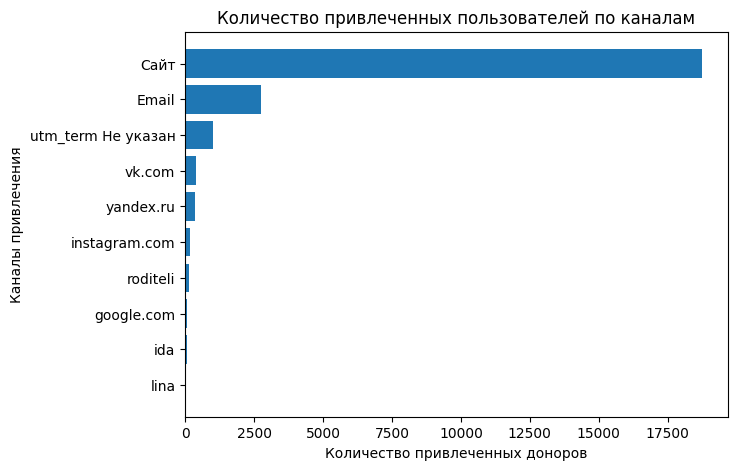

In [845]:
top_10_channels = top_10_channels.sort_values(by='кол-во привлеченных доноров')
fig = plt.figure(figsize =(7, 5))

plt.barh(top_10_channels['каналы привлечения'], top_10_channels['кол-во привлеченных доноров'])
plt.title('Количество привлеченных пользователей по каналам')
plt.xlabel("Количество привлеченных доноров")
plt.ylabel("Каналы привлечения")
plt.show()

- официальный сайт привлекает больше всего пользователей.
- второй - email рассылка.

Оценка эффективности каналов:

In [846]:
print('Общее количество касаний:', channels['user_id'].nunique())

Общее количество касаний: 23820


In [847]:
channels_count = channels.groupby('channel_id').agg(count=('user_id', 'count')).sort_values(by='count',
                                                                                                ascending=False)

In [848]:
channels_count['% от общего кол-ва'] = round(channels_count['count']/len(channels['user_id'])*100,3)
channels_count

,count,% от общего кол-ва
channel_id,,
Email,2130280,74.357
Сайт,661246,23.081
utm_term Не указан,41572,1.451
vk.com,7673,0.268
yandex.ru,6646,0.232
WebPush,4690,0.164
google.com,3531,0.123
instagram.com,2252,0.079
roditeli,1978,0.069


Самыми эффективными каналами по числу касаний являются email рассылки и официальный сайт.

Посмотрим эффективность каналов в динамике:

In [849]:
channels['action_years'] = channels['action_date'].dt.year

channels.groupby('action_years').agg(count=('user_id', 'count'))

,count
action_years,
2021,9581
2022,560169
2023,1852294
2024,442909


Прослеживается положительная динамика. Общее число касаний по всем каналам увеличивается год за годом (2024 год еще не закончился).

In [850]:
dynamic = channels.groupby(channels['action_date'].dt.to_period('Q')).agg(count=('user_id', 'count'))

In [851]:
quarter = ['2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2',
           '2023Q3', '2023Q4', '2024Q1']

dynamic['action_quarter'] = quarter

In [852]:
dynamic


,count,action_quarter
action_date,,
2021Q1,1433,2021Q1
2021Q2,2310,2021Q2
2021Q3,2150,2021Q3
2021Q4,3688,2021Q4
2022Q1,17174,2022Q1
2022Q2,86977,2022Q2
2022Q3,217922,2022Q3
2022Q4,238096,2022Q4
2023Q1,338903,2023Q1


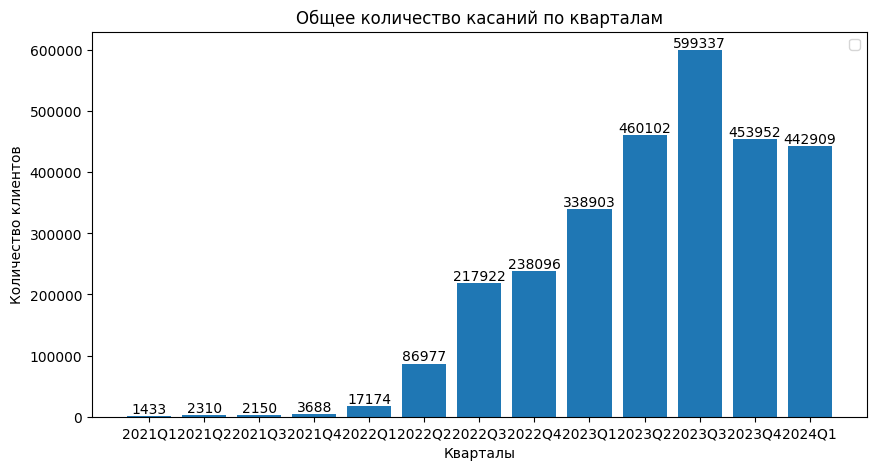

In [853]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(dynamic['action_quarter'], dynamic['count'])

ax.set_ylabel('Количество клиентов')
ax.set_xlabel('Кварталы')
ax.set_title('Общее количество касаний по кварталам')
ax.bar_label(ax.containers[0], fontsize=10)
ax.legend()

- Эффективность каналов с каждым годом увеличивается.
- Самое большое количество касаний было в 3 квартале 2023 года.
- У нас есть данные только по первому кварталу 2024 года. Число касаний в первом квартале 2024 года выше, чем в 2023 году.

Посмотрим на эффективность каналов по отдельности в динамике:

In [854]:
channels_efficiency = channels.pivot_table(index='channel_id', columns='action_years', values='user_id', aggfunc='count')
channels_efficiency = channels_efficiency.fillna(0)
channels_efficiency = channels_efficiency.reset_index()
channels_efficiency

action_years,channel_id,2021,2022,2023,2024
0,Email,0.0,402077.0,1434268.0,293935.0
1,WebPush,0.0,115.0,3001.0,1574.0
2,congratulations,0.0,0.0,197.0,34.0
3,first-stage,0.0,188.0,0.0,0.0
4,google.com,0.0,1365.0,1859.0,307.0
5,ida,0.0,456.0,13.0,0.0
6,instagram.com,0.0,552.0,1206.0,494.0
7,lina,0.0,0.0,156.0,371.0
8,ok.ru,0.0,64.0,214.0,38.0
9,org.telegram.messenger,0.0,90.0,176.0,5.0


- в 2021 году у нас есть информация только по официальному сайту.
- в 2023 году наблюдается увеличение числа касаний по всем каналам, кроме first-stage, ida, razovie, roditeli.

In [855]:
site = channels_efficiency[channels_efficiency ['channel_id'] == 'Сайт']
site

action_years,channel_id,2021,2022,2023,2024
18,Сайт,9581.0,140030.0,376248.0,135387.0


In [856]:
site = channels[channels['channel_id'] == 'Сайт'].pivot_table(index='action_years', values='user_id', aggfunc='count')

site = site.reset_index()
site

,action_years,user_id
0,2021,9581
1,2022,140030
2,2023,376248
3,2024,135387


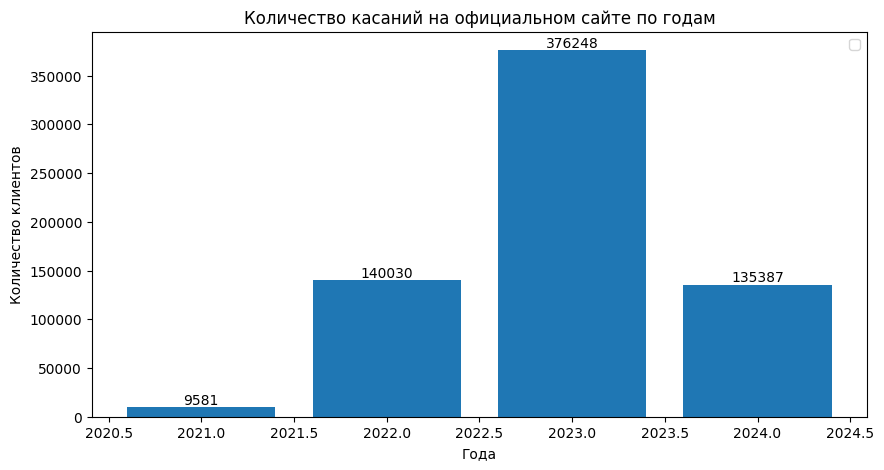

In [857]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(site['action_years'], site['user_id'])

ax.set_ylabel('Количество клиентов')
ax.set_xlabel('Года')
ax.set_title('Количество касаний на официальном сайте по годам')
ax.bar_label(ax.containers[0], fontsize=10)
ax.legend()

Количество действий на сайте с каждым годом увеличивается. В 2023 году эффективность сайта выросла в 2 раза.
За 3 месяца 2024 года набралось такое же количество действий доноров на сайте, как за весь 2022 год.

#### Каналы привлечения новых пользователей

In [858]:
new_donors_channel = channels[channels['user_id'].isin(new_donors)]

In [859]:
# выделим все первые касания доноров
first_touch = channels.sort_values(by=['user_id', 'action_date',
                                       'action_time']).drop_duplicates(subset='user_id', keep='first')

In [860]:
# выделим все первые касания новых доноров
first_touch_new = first_touch[first_touch['user_id'].isin(new_donors)]

In [861]:
first_touch_new_channels = first_touch_new.groupby('channel_id').agg(count=('user_id', 'count'))
first_touch_new_channels = first_touch_new_channels.reset_index()
first_touch_new_channels = first_touch_new_channels.rename(columns={'channel_id':'каналы привлечения',
                                                                    'count':'кол-во привлеченных доноров'})
first_touch_new_channels = first_touch_new_channels.sort_values('кол-во привлеченных доноров', ascending=False)
first_touch_new_channels

,каналы привлечения,кол-во привлеченных доноров
15,Сайт,11448
0,Email,2752
10,utm_term Не указан,982
11,vk.com,366
13,yandex.ru,361
5,instagram.com,183
9,roditeli,130
3,google.com,77
4,ida,71
6,lina,38


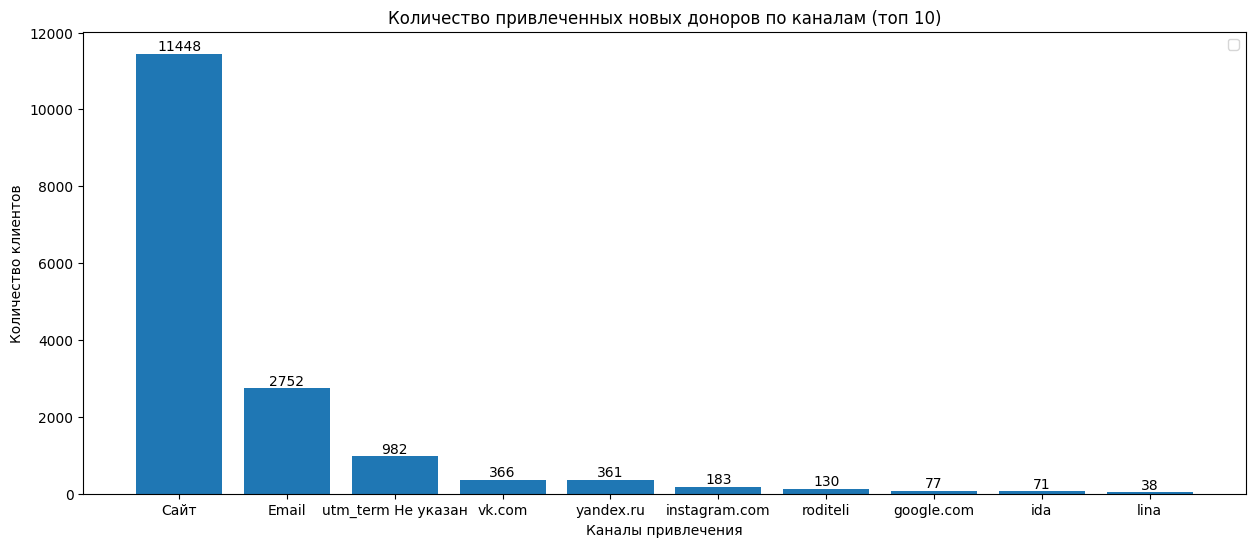

In [862]:
top_10_new_channels = first_touch_new_channels.head(10)

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(top_10_new_channels['каналы привлечения'], top_10_new_channels['кол-во привлеченных доноров'])

ax.set_ylabel('Количество клиентов')
ax.set_xlabel('Каналы привлечения')
ax.set_title('Количество привлеченных новых доноров по каналам (топ 10)')
ax.bar_label(ax.containers[0], fontsize=10)
ax.legend()

Большинство новых пользователей привлек официальный сайт.

Эффективность каналов для новых пользователей:

In [863]:
new_channels_count = new_donors_channel.groupby('channel_id').agg(count=('user_id', 'count')).sort_values(by='count',
                                                                                                ascending=False)
new_channels_count = new_channels_count.rename(columns={'count':'количество касаний'})

In [864]:
new_channels_count['% от общего кол-ва'] = round(new_channels_count['количество касаний']/len(new_donors_channel['user_id'])*100,3)
new_channels_count

,количество касаний,% от общего кол-ва
channel_id,,
Email,1238625,68.707
Сайт,505513,28.041
utm_term Не указан,30761,1.706
vk.com,7443,0.413
yandex.ru,5520,0.306
WebPush,4292,0.238
google.com,2421,0.134
instagram.com,2201,0.122
roditeli,1976,0.110


Чаще всего доноры контактируют с сайтом через email и сайт.

#### Каналы, которые вернули исторических доноров

In [865]:
# выделим все первые касания старых доноров
first_touch_old = first_touch[first_touch['user_id'].isin(old_donors)]

In [866]:
first_touch_old_channels = first_touch_old.groupby('channel_id').agg(count=('user_id', 'count'))
first_touch_old_channels = first_touch_old_channels.reset_index()
first_touch_old_channels = first_touch_old_channels.rename(columns={'channel_id':'каналы привлечения',
                                                                    'count':'кол-во привлеченных доноров'})
first_touch_old_channels = first_touch_old_channels.sort_values('кол-во привлеченных доноров', ascending=False)
first_touch_old_channels

,каналы привлечения,кол-во привлеченных доноров
7,Сайт,7289
4,utm_term Не указан,24
5,vk.com,13
6,yandex.ru,8
3,org.telegram.messenger,4
0,google.com,2
1,instagram.com,2
2,ok.ru,1


Большинство исторических доноров вернулись через сайт.

Эффективность каналов для исторических пользователей:

In [867]:
old_donors_channel = channels[channels['user_id'].isin(old_donors)]
old_channels_count = old_donors_channel.groupby('channel_id').agg(count=('user_id', 'count')).sort_values(by='count',
                                                                                                ascending=False)
old_channels_count = old_channels_count.rename(columns={'count':'количество касаний'})

In [868]:
old_channels_count['% от общего кол-ва'] = round(old_channels_count['количество касаний']/len(old_donors_channel['user_id'])*100,3)
old_channels_count

,количество касаний,% от общего кол-ва
channel_id,,
Email,891655,83.945
Сайт,155733,14.662
utm_term Не указан,10811,1.018
yandex.ru,1126,0.106
google.com,1110,0.105
WebPush,398,0.037
report,362,0.034
razovie,269,0.025
yoomoney.ru,251,0.024


В 83.9% исторические доноры контактируют с фондом через Email, только 14.6% через сайт.

### Портрет типичного донора

**Пол**

In [869]:
# распределение всех доноров по полу
id_donor.groupby('sex').agg(count=('user_id', 'count'))

,count
sex,
female,14410
male,4305


In [870]:
# распределение исторических доноров по полу
id_donor[id_donor['user_id'].isin(old_donors)].groupby('sex').agg(count=('user_id', 'count'))

,count
sex,
female,3569
male,1288


In [871]:
# распределение новых доноров по полу
id_donor[id_donor['user_id'].isin(new_donors)].groupby('sex').agg(count=('user_id', 'count'))

,count
sex,
female,10841
male,3017


**Регион**

In [872]:
# распределение всех доноров по региону
region = id_donor.groupby('area_name').agg(count=('user_id', 'count'))
region.sort_values(by='count', ascending=False).head()

,count
area_name,
Vienna,2757
Москва,997
Санкт-Петербург,210
Краснодар,77
Екатеринбург,69


In [873]:
# распределение исторических доноров по региону
region = id_donor[id_donor['user_id'].isin(old_donors)].groupby('area_name').agg(count=('user_id', 'count'))
region.sort_values(by='count', ascending=False).head()

,count
area_name,
Vienna,2757
Москва,997
Санкт-Петербург,210
Краснодар,77
Екатеринбург,69


In [874]:
# распределение новых доноров по региону
region = id_donor[id_donor['user_id'].isin(new_donors)].groupby('area_name').agg(count=('user_id', 'count'))
region.sort_values(by='count', ascending=False).head()

,count
area_name,


**Рекуррент**

In [875]:
# рекуррент или нет (все доноры)
id_donor.groupby('is_recurrent').agg(count=('user_id', 'count'))

,count
is_recurrent,
False,5278
True,645


In [876]:
# рекуррент или нет (исторические)
id_donor[id_donor['user_id'].isin(old_donors)].groupby('is_recurrent').agg(count=('user_id', 'count'))

,count
is_recurrent,
False,495
True,328


In [877]:
# рекуррент или нет (новые доноры)
id_donor[id_donor['user_id'].isin(new_donors)].groupby('is_recurrent').agg(count=('user_id', 'count'))

,count
is_recurrent,
False,4783
True,317


**Подписка на рассылку**

In [878]:
# подписаны на email рассылку или нет (все доноры)
id_donor.groupby('is_email_subscribed').agg(count=('user_id', 'count'))

,count
is_email_subscribed,
False,3202
True,20276


In [879]:
# подписаны на email рассылку или нет (исторические доноры)
id_donor[id_donor['user_id'].isin(old_donors)].groupby('is_email_subscribed').agg(count=('user_id', 'count'))

,count
is_email_subscribed,
False,710
True,6576


In [880]:
# подписаны на email рассылку или нет (новые доноры)
id_donor[id_donor['user_id'].isin(new_donors)].groupby('is_email_subscribed').agg(count=('user_id', 'count'))

,count
is_email_subscribed,
False,2492
True,13700


**Среднее количество пожертвований**

In [881]:
q = orders[orders['order_status'] == 'Paid'].groupby('user_id').agg(count=('quantity', 'sum')).reset_index()
print('среднее количество пожертвований (все доноры):', round(q['count'].mean()))

среднее количество пожертвований (все доноры): 3


In [882]:
q = orders[(orders['user_id'].isin(old_donors))&(orders['order_status'] == 'Paid')].groupby('user_id').agg(count=('quantity', 'sum')).reset_index()
print('среднее количество пожертвований (исторические доноры):', round(q['count'].mean()))

среднее количество пожертвований (исторические доноры): 4


In [883]:
q = orders[(orders['user_id'].isin(new_donors))&(orders['order_status'] == 'Paid')].groupby('user_id').agg(count=('quantity', 'sum')).reset_index()
print('среднее количество пожертвований (новые доноры):', round(q['count'].mean()))

среднее количество пожертвований (новые доноры): 2


**Средний чек**

In [884]:
print('средний чек (все доноры):', round(orders[orders['order_status'] == 'Paid']['total_price'].mean(),2))

средний чек (все доноры): 743.53


In [885]:
print('средний чек (исторические доноры):',
      round(orders[(orders['user_id'].isin(old_donors))&(orders['order_status'] == 'Paid')]['total_price'].mean(),2))

средний чек (исторические доноры): 729.15


In [886]:
print('средний чек (новые доноры):',
      round(orders[(orders['user_id'].isin(new_donors))&(orders['order_status'] == 'Paid')]['total_price'].mean(),2))

средний чек (новые доноры): 756.0


In [887]:
portret = pd.DataFrame([
    ['пол', 'женский', 'женский', 'женский'],
    ['регион', 'Вена', 'Вена', 'неизвестно'],
    ['рекуррент', 'нет', 'нет', 'нет'],
    ['подписан на email рассылку','да', 'да', 'да'],
    ['канал привлечения', 'сайт', 'сайт', 'сайт'],
    ['количество пожертвований', 3, 4, 2  ],
    ['средний чек', 743.53, 729.15, 756.0]
     ],
    columns=['показатели','все доноры', 'исторические доноры', 'новые доноры'])


portret

,показатели,все доноры,исторические доноры,новые доноры
0,пол,женский,женский,женский
1,регион,Вена,Вена,неизвестно
2,рекуррент,нет,нет,нет
3,подписан на email рассылку,да,да,да
4,канал привлечения,сайт,сайт,сайт
5,количество пожертвований,3,4,2
6,средний чек,743.53,729.15,756.0


### RFM анализ

RFM-анализ — метод анализа, позволяющий сегментировать клиентов по частоте и сумме покупок и выявлять тех, которые приносят больше денег.

Аббревиатура RFM расшифровывается:

- **Recency** — давность (как давно клиент купил товар в последний раз).
- **Frequency** — частота (как часто они у вас покупают).
- **Monetary** — деньги (общая сумма трат).

Для начала, нужно выделить заказы из файла orders с успешными оплатами:

In [888]:
# срез с успешными оплатами
paid_donors = orders[orders['order_status']=='Paid']

Дату анализа выставлю максимальную дату в датасете + 1 день

In [889]:
work_date = paid_donors['action_datetimeutc'].max() + pd.Timedelta('1d')
work_date

Timestamp('2024-03-19 12:03:00')

Создаю rfm таблицу с id донора, количеством заказов, общей суммой пожертвований, с первой и последней датой покупки:

In [890]:
rfm = paid_donors.groupby('user_id').agg({'action_id': 'count',
                                     'total_price': 'sum',
                                     'action_datetimeutc': ['min', 'max']}).reset_index()

In [891]:
rfm.columns = ['id', 'orders_count', 'total_sales', 'start_date', 'end_date']

rfm.head()

,id,orders_count,total_sales,start_date,end_date
0,2734,2,51,2021-03-18 10:52:00,2021-10-14 15:50:00
1,2847,3,1000,2021-06-16 23:10:00,2023-12-15 03:39:00
2,2861,7,120,2021-03-16 12:24:00,2022-12-07 14:17:00
3,3361,1,3000,2022-12-20 09:32:00,2022-12-20 09:32:00
4,4982,11,840,2021-01-01 20:52:00,2024-02-13 18:55:00


Период жизни клиента - разница между конечной и начальной датой

In [892]:
rfm['period'] = (rfm.end_date - rfm.start_date) / pd.Timedelta('1d') + 1

**Recency - давность.**

Это время с момента последнего заказа.  От даты анализа work date отнимем дату последнего заказа.

In [893]:
rfm['r_value'] = (work_date - rfm.end_date) / pd.Timedelta('1d')

**Frequency - частота пожертований.**

Чтобы определить частоту, нужно детально изучить данные, так как у многих доноров период жизни 1-2 дня. Сделаю подробный анализ внизу.

**Monetary - это сумма всех заказов клиента**.

In [894]:
rfm['m_value'] = rfm.total_sales

In [895]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18721 entries, 0 to 18720
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            18721 non-null  int64         
 1   orders_count  18721 non-null  int64         
 2   total_sales   18721 non-null  int64         
 3   start_date    18721 non-null  datetime64[ns]
 4   end_date      18721 non-null  datetime64[ns]
 5   period        18721 non-null  float64       
 6   r_value       18721 non-null  float64       
 7   m_value       18721 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(4)
memory usage: 1.1 MB


Проверим столбцы на выбросы прежде чем бить их на ранги

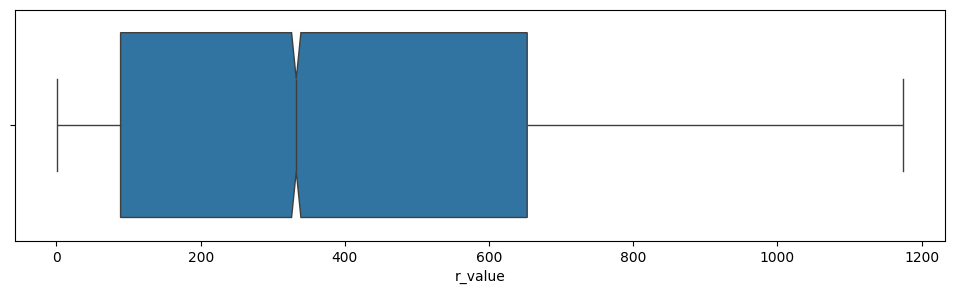

In [896]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=rfm.r_value, notch=True)
plt.show()

В столбце с recency нет выбросов.

Нахожу интервалы для разбиения столбца recency на три ранга (дополнительно для интервалов указываю минимальное и максимальное значения в столбце):



In [897]:
r_bins = [0] + list(np.percentile(rfm['r_value'].tolist(), [25, 50])) + [rfm.r_value.max()]

In [898]:
r_bins

[0, 88.97430555555556, 332.61319444444445, 1173.5020833333333]

Присваиваю рангам баллы от 1 до 3:

In [899]:
r_labels = [3, 2, 1]

Создаю новый столбец с рангом R, разбив столбец r_value на три равных интервала:

In [900]:
rfm['R'] = pd.cut(rfm.r_value, labels=r_labels, bins=r_bins, include_lowest=True)

F_VALUE

Чтобы определить частоту, нужно детально изучить данные, так как у многих доноров период жизни 1-2 дня, они сделали пожертования 1 день и больше не возвращались. Их нужно добавить в один сегмент как разовые.

In [901]:
# количество доноров, период жизни которых не превышает 2 дня
len(rfm[rfm['period'] <= 2]['period'])

13291

In [902]:
# общее количество доноров
len(rfm['id'])

18721

In [903]:
# количество доноров, живущих больше 2 дней
len(rfm['id']) - len(rfm[rfm['period']< 1.2]['period'])

5494

13227 доноров - разовые. Сделали пожертвования только в один день и больше не заходили.

f_value я им поставлю 0.

In [904]:
rfm.loc[rfm['period'] <= 2, 'f_value']=0

Изучим лояльных клиентов:

In [905]:
loyal_donors = rfm.loc[rfm['period'] > 2]
loyal_donors.sort_values(by = 'orders_count').tail()

,id,orders_count,total_sales,start_date,end_date,period,r_value,m_value,R,f_value
9434,33202,105,24250,2022-07-24 11:36:00,2023-08-30 03:46:00,402.673611,202.345139,24250,2,NaN
5264,25797,117,1767,2021-05-21 00:00:00,2024-03-09 20:10:00,1024.840278,9.661806,1767,3,NaN
5216,25737,130,68110,2022-04-13 19:50:00,2024-02-02 08:16:00,660.518056,46.157639,68110,3,NaN
12597,38457,132,28339,2023-06-17 16:19:00,2024-03-18 07:33:00,275.634722,1.187500,28339,3,NaN
3633,22683,157,28861,2021-01-13 00:00:00,2024-03-18 05:47:00,1161.240972,1.261111,28861,3,NaN


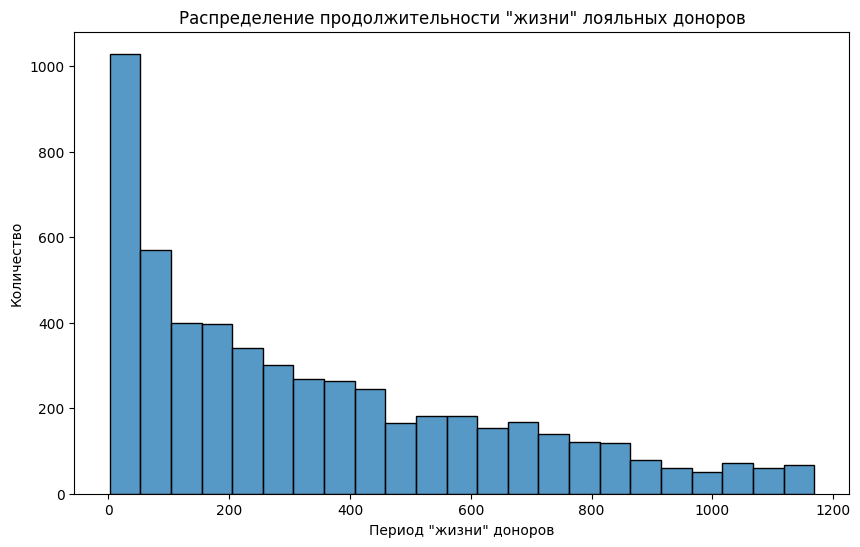

In [906]:
plt.figure(figsize=(10, 6))
sns.histplot(loyal_donors.period)
plt.title('Распределение продолжительности "жизни" лояльных доноров')
plt.xlabel('Период "жизни" доноров')
plt.ylabel('Количество')
plt.show()

Период жизни лояльных доноров, тех, кто жил/живет дольше 2х дней, варьируется от 3х до 1200 дней. Большинство из них живут до 50 дней.

Посмотрим на количество заказов:

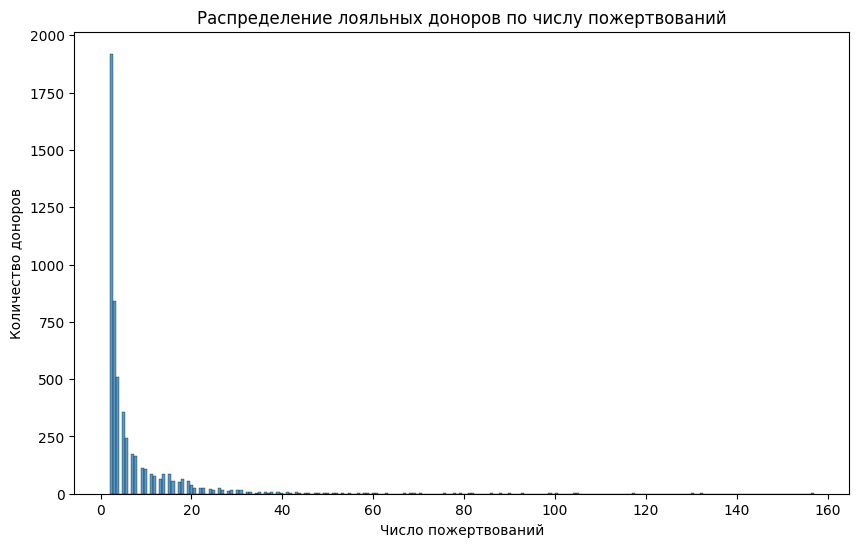

In [907]:
plt.figure(figsize=(10, 6))
sns.histplot(loyal_donors.orders_count)
plt.title('Распределение лояльных доноров по числу пожертвований')
plt.xlabel('Число пожертвований')
plt.ylabel('Количество доноров')
plt.show()

Число пожертвований варьируется от 1 до 157.

Количество лояльных доноров, сделавших пожертвования меньше 10 раз: 4311



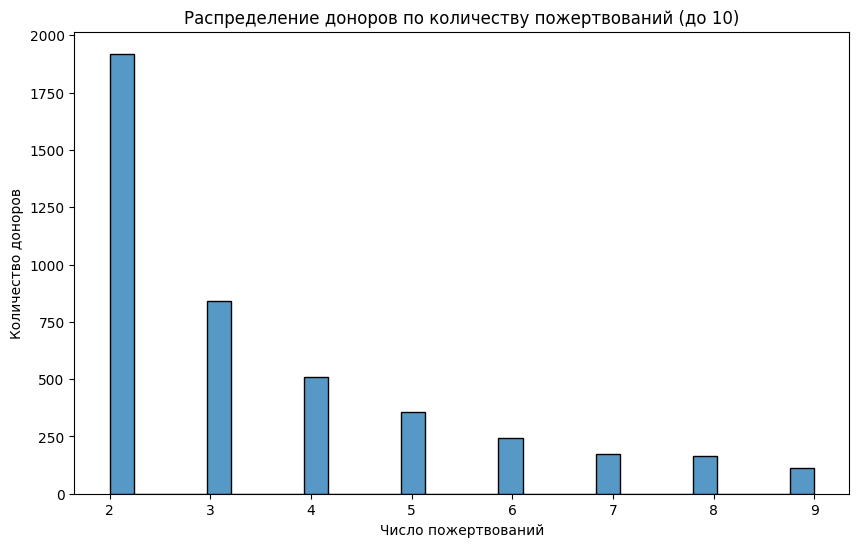

In [908]:
print('Количество лояльных доноров, сделавших пожертвования меньше 10 раз:',
      len(loyal_donors[loyal_donors['orders_count']<10]['orders_count']))
print()

plt.figure(figsize=(10, 6))
sns.histplot(loyal_donors[loyal_donors['orders_count']<10]['orders_count'])
plt.title('Распределение доноров по количеству пожертвований (до 10)')
plt.xlabel('Число пожертвований')
plt.ylabel('Количество доноров')
plt.show()

Большое количество лояльных доноров сделали пожертвования не более 2 раз.

**Хочу посчитать частоту пожертвований в месяцах.**

Посмотрим, сколько доноров не доживают до 1 месяца:

In [909]:
len(loyal_donors[loyal_donors['period'] <=31])

668

Сколько доноров живут больше месяца:

In [910]:
len(loyal_donors[loyal_donors['period']>32].sort_values('period'))

4700

Посчитаем период жизни доноров в месяцах:

In [911]:
loyal_donors['month'] = loyal_donors['period']/30

<ipython-input-911-58c421c8e698>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loyal_donors['month'] = loyal_donors['period']/30


На ноль делить нельзя, поэтому для всех доноров, проживших не более месяца, поставим 0 в столбцах month и f_value.

In [912]:
loyal_donors.loc[loyal_donors['period'] < 32, 'month'] = 0

Посчитаю количество пожертвований в месяц:

In [913]:
loyal_donors['f_value'] = loyal_donors['orders_count']/loyal_donors['month']

<ipython-input-913-3e263c8cbe92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loyal_donors['f_value'] = loyal_donors['orders_count']/loyal_donors['month']


In [914]:
loyal_donors.loc[loyal_donors['month'] == 0, 'f_value'] = 0

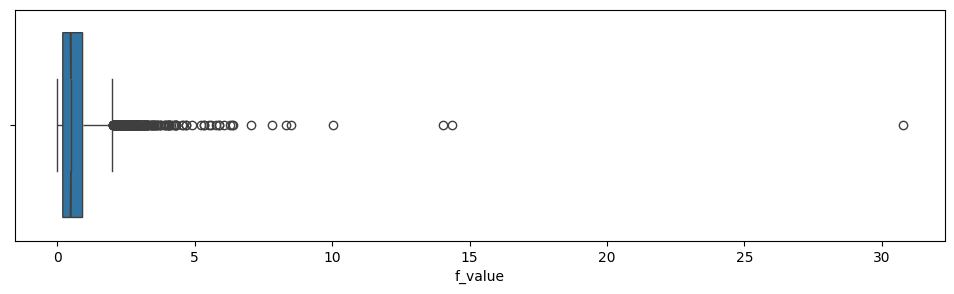

In [915]:
plt.figure(figsize=(12, 3))
sns.boxplot(x= loyal_donors.f_value, notch=True)
plt.show()

В столбце f_value есть выбросы, почистим их:

In [916]:
fq1, fq3 = np.percentile(loyal_donors.f_value, [25, 75])
f_iqr = fq3 - fq1

In [917]:
f_top = fq3 + 1.5 * f_iqr

In [918]:
f_clean = loyal_donors[loyal_donors.f_value < f_top]['f_value'].tolist()

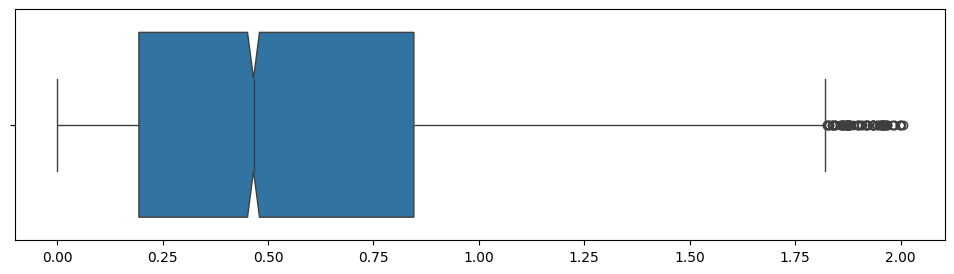

In [919]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=f_clean, notch=True)
plt.show()

Самостоятельно выделю 2 интервала (1 и максимальное количество), так как хочу разделить доноров на тех, кто делал пожертвования раз в месяц, и больше 1 раза в месяц,

In [920]:
 f_bins = [0, 1.0, 30.750277196008376]

Присвою им ранги:

In [921]:
f_labels = [2, 3]

In [922]:
loyal_donors['F'] = pd.cut(loyal_donors.f_value, labels=f_labels, bins=f_bins, include_lowest=True)

<ipython-input-922-b2ee53b48a6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loyal_donors['F'] = pd.cut(loyal_donors.f_value, labels=f_labels, bins=f_bins, include_lowest=True)


Выделю id лояльных доноров по рангам.

In [923]:
f2_id = loyal_donors[loyal_donors['F'] == 2]['id']
f3_id = loyal_donors[loyal_donors['F'] == 3]['id']

Создаю новый столбец с рангом F в датасете rfm:

In [924]:
rfm['F'] = 1

In [925]:
rfm.loc[rfm['id'].isin(f2_id), 'F'] = 2
rfm.loc[rfm['id'].isin(f3_id), 'F'] = 3

In [926]:
rfm.groupby('F').agg(count=('id','count'))

,count
F,
1,13291
2,4240
3,1190


In [927]:
rfm.head()

,id,orders_count,total_sales,start_date,end_date,period,r_value,m_value,R,f_value,F
0,2734,2,51,2021-03-18 10:52:00,2021-10-14 15:50:00,211.206944,886.842361,51,1,NaN,2
1,2847,3,1000,2021-06-16 23:10:00,2023-12-15 03:39:00,912.186806,95.350000,1000,2,NaN,2
2,2861,7,120,2021-03-16 12:24:00,2022-12-07 14:17:00,632.078472,467.906944,120,1,NaN,2
3,3361,1,3000,2022-12-20 09:32:00,2022-12-20 09:32:00,1.000000,455.104861,3000,1,0.0,1
4,4982,11,840,2021-01-01 20:52:00,2024-02-13 18:55:00,1138.918750,34.713889,840,3,NaN,2


M_VALUE

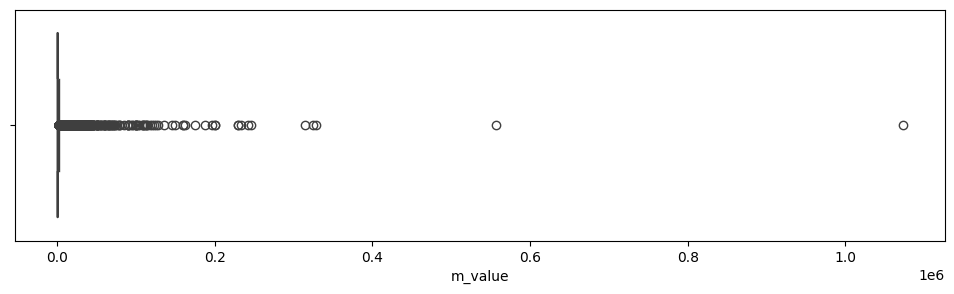

In [928]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=rfm.m_value, notch=True)
plt.show()

Почищу данные от выбросов:

In [929]:
mq1, mq3 = np.percentile(rfm.m_value, [25, 75])
m_iqr = mq3 - mq1

In [930]:
m_top = mq3 + 1.5 * m_iqr

In [931]:
m_clean = rfm[rfm.m_value < m_top]['m_value'].tolist()

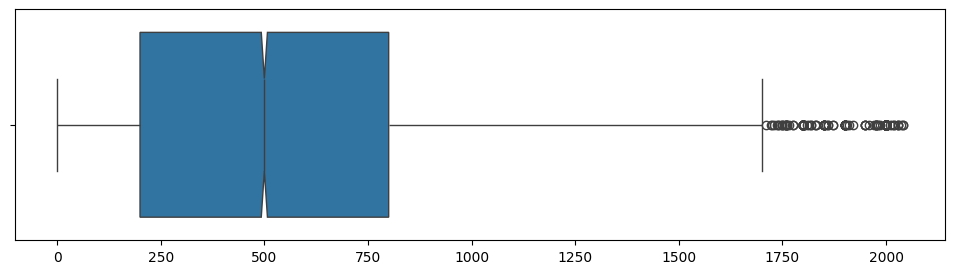

In [932]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=m_clean, notch=True)
plt.show()

In [933]:
m_bins = [0] + list(np.percentile(m_clean, [33, 66])) + [rfm.m_value.max()]

In [934]:
m_bins

[0, 300.0, 500.0, 1072500]

In [935]:
m_labels = [1, 2, 3]

In [936]:
rfm['M'] = pd.cut(rfm.m_value, labels=m_labels, bins=m_bins, include_lowest=True)

Получаем итоговый сегмент RFM сложив все три ранга как строки:

In [937]:
rfm['RFM'] = rfm.R.astype('str') + rfm.F.astype('str') + rfm.M.astype('str')

In [938]:
rfm.sample(5)

,id,orders_count,total_sales,start_date,end_date,period,r_value,m_value,R,f_value,F,M,RFM
10038,34230,2,250,2022-12-29 11:36:00,2023-12-29 04:27:00,365.702083,81.316667,250,3,NaN,2,1,321
165,9706,1,300,2021-09-11 00:00:00,2021-09-11 00:00:00,1.000000,920.502083,300,1,0.0,1,1,111
17791,45601,2,300,2024-02-13 19:05:00,2024-02-28 19:52:00,16.032639,19.674306,300,3,NaN,2,1,321
12493,38324,2,600,2023-06-15 16:01:00,2023-07-13 09:49:00,28.741667,250.093056,600,2,NaN,2,3,223
130,9378,2,1000,2021-06-19 00:00:00,2021-06-19 00:00:00,1.000000,1004.502083,1000,1,0.0,1,3,113


Описание сегментов: 1 - плохо, 3 - хорошо

|Ранг/Показатель|R|F|M|
|:--|:--:|:--:|:--:|
|1|Не был больше чем 563 дней|Разовый донор (сделал пожертвование только 1 день и не возращался)|Чек от 300|
|2|Был от 165 до 563 дней|Делает / делал пожертвования меньше 1 раза в месяц|Чек от 300 до 500|
|3|Был меньше чем 165 дней назад|Делает / делал пожертвования от 1 раза в месяц|Чек выше 500|

|Сегмент|Тип клиентов|Стратегия|
|:--|:--|:--|
|333|**Ключевые**|**нужно установить с ними близкий контакт:**|
||-делали пожертвования недавно|- отправлять благодарственные письма|
||-часто обращаются|- учредить награду для крупных доноров|
||-много тратят|- отправлять счастливые истории на email|
|332, 331, 322|**Лояльные**|**мотивировать тратить больше**|
||-заказывали недавно|- попробовать добавить в вариантах суммы |
||-тратят часто или средне|пожертвований и большие суммы. |
||-тратят не очень много|Например: 500, 1500, 5000.|
||-рекурренты|- создать ранговую систему по сумме пожертвований:|
|||Например: неравнодушный (до 1000 руб), заботливый (до 3000 руб), герой (от 10000) итд|
|323, 233, 223|**Крупные**|**увеличить частоту пожертвований**|
||-заказывают нерегулярно|можно создать для них специальную рассылку с информацией|
||-тратят много|о том, что для закрытия сбора ребенка не хватает сколько-то средств.|
|232, 231, 222, 221, 212, 211|**Неактивные:** |**нужно возвращать их**|
||-давно не обращались|- создать для них специальную рассылку, экспериментировать с форматами|
|||цель: снова вызвать интерес этих доноров|
|213, 133, 123, 113|**Крупные неактивные**|**нужно возвращать их**|
||-заказывали давно|возможно, они начали донатить в другой фонд|
||-тратят много|-нужно провести анализ конкурентов|
||-тратят много|и пересмотреть стратегию продвижения|
|321, 313, 312, 311	|**Новые**: |**мотивировать их остаться и становиться постоянным донором**|
||-недавно заказывали впервые|- также может сработать ранговая система|
|||-сразу присваивать ранг "неравнодушный" и отправить письмо|
|||о том, что если пожертвовать еще 1000, можно перейти на следуюший ранг.|
|132, 131|**Почти потерянные:** |**нужно удержать их**|
||-в прошлом много заказывали, но давно не обращались|нужно показывать им результат работы фонда.|
|||- создать специальную рассылку|
|||с результатами работы.|
|112, 121, 122, 111|**Ушедшие**|**нужно возвращать их**|
||-заказывали немного|- отправить персонализированное письмо на почту|
||-давно не обращались|с опросом: почему давно не обращались?что не понравилось?|
|||После поработать над продуктов и пригласить снова стать донором.|

Создаем новый столбец в таблице rfm с названием сегмента:

In [939]:
def make_segments(cell: str) -> str:
    'присвоение типа клиенту в зависимости от RFM сегмента'
    new_cell = ''

    if cell in ['333']:
      new_cell = 'ключевой'
    elif cell in ['332', '331', '322']:
      new_cell = 'лояльный'
    elif cell in ['323', '233', '223']:
      new_cell = 'крупный'
    elif cell in ['232', '231', '222', '221', '212', '211']:
      new_cell = 'неактивный'
    elif cell in ['213', '133', '123', '113']:
      new_cell = 'крупный неактивный'
    elif cell in ['321', '313', '312', '311']:
      new_cell = 'новый'
    elif cell in ['132', '131']:
      new_cell = 'почти потерянный'
    else:
      new_cell = 'ушедший'

    return new_cell

In [940]:
rfm['segment'] = rfm.RFM.apply(make_segments)

In [941]:
rfm.groupby('segment').agg({'id': 'nunique',
                            'total_sales': 'sum',
                            'period': 'mean'}).reset_index().rename(columns={
                                'id': 'clients_count',
                                'total_sales': 'segment_income',
                                'period': 'lifetime'
                            }).style.highlight_max(subset=['clients_count', 'segment_income', 'lifetime'], color='lime')

,segment,clients_count,segment_income,lifetime
0,ключевой,502,5947436,322.471944
1,крупный,2657,15732548,448.172429
2,крупный неактивный,3854,12465977,70.240233
3,лояльный,209,79739,193.584659
4,неактивный,2737,867091,27.523315
5,новый,2464,1792945,13.035068
6,почти потерянный,115,35863,75.039287
7,ушедший,6183,1785069,10.979619


- Самое большое количество доноров, к сожалению, принадлежат сегменту "ушедший".
- Самыми прибыльными и лояльными являются доноры из сегмента "крупный".

**Каналы привлечения по сегментам RFM**

Ранее создала датасет first_touch, где сохранила только первые касания доноров. Объединим эту таблицу с rfm, чтобы создать новый столбец с каналом привлечения.

In [942]:
first_touch = first_touch.rename(columns={'user_id': 'id'})

In [943]:
rfm = rfm.merge(first_touch[['id','channel_id']], on='id')

In [944]:
rfm.head()

,id,orders_count,total_sales,start_date,end_date,period,r_value,m_value,R,f_value,F,M,RFM,segment,channel_id
0,2734,2,51,2021-03-18 10:52:00,2021-10-14 15:50:00,211.206944,886.842361,51,1,NaN,2,1,121,ушедший,Сайт
1,2847,3,1000,2021-06-16 23:10:00,2023-12-15 03:39:00,912.186806,95.350000,1000,2,NaN,2,3,223,крупный,Сайт
2,2861,7,120,2021-03-16 12:24:00,2022-12-07 14:17:00,632.078472,467.906944,120,1,NaN,2,1,121,ушедший,Сайт
3,3361,1,3000,2022-12-20 09:32:00,2022-12-20 09:32:00,1.000000,455.104861,3000,1,0.0,1,3,113,крупный неактивный,Сайт
4,4982,11,840,2021-01-01 20:52:00,2024-02-13 18:55:00,1138.918750,34.713889,840,3,NaN,2,3,323,крупный,Сайт


In [945]:
rfm.groupby('segment').agg({'id': 'nunique',
                            'total_sales': 'sum',
                            'period': 'mean',
                            'channel_id':'max'}).reset_index().rename(columns={
                                'id': 'clients_count',
                                'total_sales': 'segment_income',
                                'period': 'lifetime',
                                'channel_id':'channel'
                            }).style.highlight_max(subset=['clients_count', 'segment_income', 'lifetime'], color='lime')

,segment,clients_count,segment_income,lifetime,channel
0,ключевой,502,5947436,322.471944,Сайт
1,крупный,2657,15732548,448.172429,Сайт
2,крупный неактивный,3854,12465977,70.240233,Сайт
3,лояльный,209,79739,193.584659,Сайт
4,неактивный,2737,867091,27.523315,Сайт
5,новый,2462,1792495,13.044845,Сайт
6,почти потерянный,115,35863,75.039287,Сайт
7,ушедший,6183,1785069,10.979619,Сайт


Все сегменты приходят из официального сайта фонда.

**Средний чек по сегментам**

Добавим столбец с названиями сегментов в файл paid_donors (срез файла orders с успешными оплатами):

In [946]:
segments = rfm[['id', 'segment']]
segments = segments.rename(columns={'id':'user_id'})

In [947]:
paid_donors = pd.merge(paid_donors, segments, how="left", on='user_id')

In [948]:
paid_donors.groupby('segment').agg({'total_price': 'mean'})

,total_price
segment,
ключевой,651.060317
крупный,804.158045
крупный неактивный,1351.911615
лояльный,98.079951
неактивный,264.599023
новый,631.160211
почти потерянный,80.954853
ушедший,263.946326


Самый большой чек у крупных и неактивных клиентов.

### Анализ активности доноров

Посмотрим на количество уникальных доноров за сутки.

In [949]:
pay = (
    orders.groupby('action_datetimeutc')
    .agg({'user_id': 'nunique'})
)

<Figure size 1500x500 with 0 Axes>

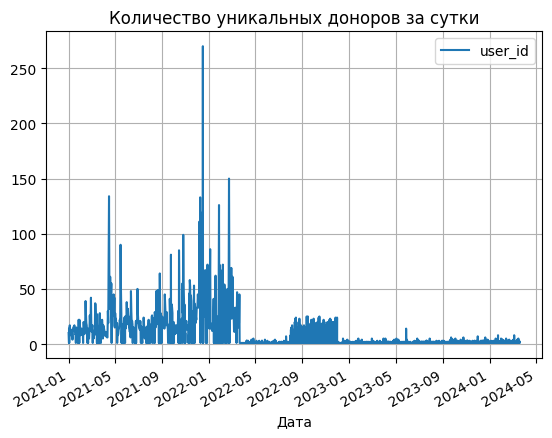

In [950]:
plt.figure(figsize=(15, 5))

# строим график
pay.plot(grid='True')
plt.xlabel('Дата')
plt.title('Количество уникальных доноров за сутки')
plt.show()

В некоторых днях мы видим всплески активности. Посмотрим, какие акции привели к этому:

In [951]:
promo = (
    orders.groupby(['action_datetimeutc', 'product_name'])
    .agg({'user_id': 'nunique'})
)
promo = promo.reset_index()

In [952]:
promo[promo['user_id']>=100].sort_values('user_id', ascending=False)

,action_datetimeutc,product_name,user_id
974,2021-12-16,На уставную деятельность,270
129,2021-04-16,На уставную деятельность,134
949,2021-12-09,На уставную деятельность,131
1279,2022-02-22,Пожертвование Благотворительный фонд «АиФ. Доб...,126
957,2021-12-13,На уставную деятельность,117
946,2021-12-07,На уставную деятельность,109


In [953]:
channels[channels['action_date'] == '2022-02-22']['user_action'].unique()

array(['Оплата заказа'], dtype=object)

Посмотрим на количество доноров по промо без "уставной деятельности".

In [954]:
promo[promo['product_name'] != 'На уставную деятельность'].sort_values('user_id', ascending=False).head(5)

,action_datetimeutc,product_name,user_id
1279,2022-02-22,Пожертвование Благотворительный фонд «АиФ. Доб...,126
1153,2022-01-27,Пожертвование Благотворительный фонд «АиФ. Доб...,87
1171,2022-01-31,Пожертвование Благотворительный фонд «АиФ. Доб...,49
620,2021-09-24,Пожертвование Благотворительный фонд «АиФ. Доб...,46
719,2021-10-15,Пожертвование Благотворительный фонд «АиФ. Доб...,45


22 февраля 2022 года на сайт зашло 126 уникальных доноров по промо для Тимура Батулина . Стоит посмотреть, какие именно действия были в этот день для этого ребенка.

Посмотрим средний чек по промо:

In [955]:
# срез с успешными оплатами
paid_donors = orders[orders['order_status']=='Paid']

In [956]:
promo_bill = (
    paid_donors.groupby('product_name')
    .agg({'total_price': 'mean'})
)
promo_bill.sort_values('total_price', ascending=False)

,total_price
product_name,
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Александр Слепухин,3452.000000
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Дарья Тортоева,2307.575758
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Никита Яковлев,2104.582447
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Анастасия Лазгиян,2007.516667
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Виктория Чернышова,1976.288000
...,...
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Илья Кулаков,75.000000
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Ростислав Иванов,50.000000
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Тимофей Мухин,50.000000



Посмотрим общую сумму сборов по промо:

In [957]:
promo_price = (
    paid_donors.groupby('product_name')
    .agg({'total_price': 'sum'})
)
promo_price.sort_values('total_price', ascending=False).head()

,total_price
product_name,
На уставную деятельность,8555077
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование (хочу помочь),2996172
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»,2212190
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Егор Цуканов,1072858
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Григорий Белослюдцев,1024832


Больше всего денег отправляют на уставню деятельность. Вторым крупным каналом по привлечению денег является ежемесечная подписка "хочу помочь".

**Топ пользователей по сумме донатов:**

In [958]:
# срез с успешными оплатами
paid_donors = orders[orders['order_status']=='Paid']

In [959]:
top_sales = paid_donors.groupby('user_id').agg(total_price=('total_price', 'sum')).sort_values('total_price', ascending=False).head(10).reset_index()
top_sales = top_sales.rename(columns={'user_id': 'id доноров', 'total_price':'Сумма пожертвований'})

Text(0.5, 1.0, 'Топ 10 доноров по сумме пожертвований')

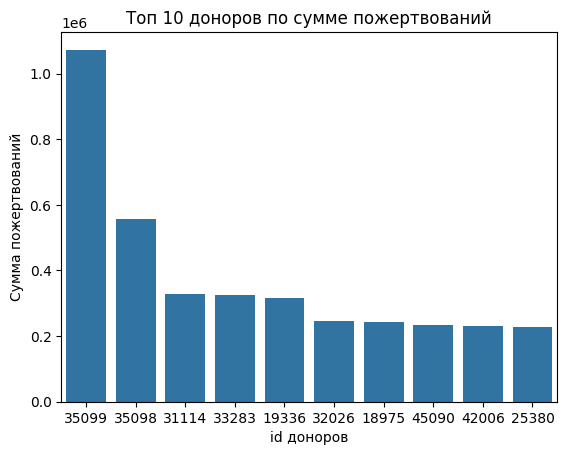

In [960]:
sns.barplot(data=top_sales, x="id доноров", y="Сумма пожертвований",
            order=top_sales['id доноров']).set_title('Топ 10 доноров по сумме пожертвований')

Посмотрим, какие действия совершал на сайте донор с самой большой суммой трат:

In [961]:
orders_35099 = orders[orders['user_id'] == 35099][['user_id','action_datetimeutc', 'total_price',
                                                   'product_name', 'quantity', 'order_status']]
orders_35099

,user_id,action_datetimeutc,total_price,product_name,quantity,order_status
48507,35099,2023-02-03 14:08:00,30000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48508,35099,2023-02-03 14:13:00,10000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48509,35099,2023-02-03 14:17:00,10000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48535,35099,2023-02-15 13:03:00,10000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48536,35099,2023-02-15 12:58:00,15000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48538,35099,2023-03-31 08:29:00,25000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48539,35099,2023-03-31 08:42:00,20000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48540,35099,2023-04-03 09:24:00,30000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,notpaid
48541,35099,2023-04-03 09:24:00,30000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,notpaid
48542,35099,2023-04-03 09:29:00,30000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,notpaid


Видим, что донор с id 35099 не оформлял подписку, а делал пожертования определенным нуждающимся. Заходит на сайт и жертвует деньги несколько раз одному ребенку с разницей в несколько минут в один день.

Посмотрим на его действия на сайте:

In [962]:
channels[channels['user_id'] == 35099].groupby('user_action').agg(count=('action_date', 'count')).sort_values('count', ascending=False).head(10)

,count
user_action,
Просмотр “Дети”,234
Оформление заказа в операции Заказ - Создание неавторизованным,58
Изменение статуса заказа в операции Заказ - Смена статуса.,51
Спасибо за разовое пожертвование (повторные) Отправка,44
Спасибо за разовое пожертвование (повторные),44
Переход на сайт,36
Спасибо за разовое пожертвование (повторные) Открытие,25
Показ попапа Подписка на вебпуши,24
Пожертвование — разово,13


Донор 35099 чаще всего на сайте просматривает страницу с нуждающимся детьми. Как мы увидели выше, донор заходит на сайт, выбирает ребенка и делает пожертвования одному ребенку с разницей в несколько минут.

Возможно, он несколько раз делает пожертвования с разницей в несколько минут, так как хочет увидеть, что сумма уже собрана. Проверим эту гипотезу:

In [963]:
channels[(channels['user_id'] == 35099)&(channels['action_date'] == '2023-04-03')]

,user_action,action_date,channel_id,utm_campaign,utm_source,utm_medium,user_id,action_time,action_years
929618,Показ попапа Подписка на вебпуши,2023-04-03,Сайт,NaN,NaN,NaN,35099,9,2023
929619,Просмотр “Дети”,2023-04-03,Сайт,NaN,NaN,NaN,35099,9,2023
929620,Просмотр “Дети”,2023-04-03,Сайт,NaN,NaN,NaN,35099,9,2023
929621,Переход на сайт,2023-04-03,google.com,NaN,NaN,NaN,35099,9,2023
929622,Пожертвование — разово,2023-04-03,Сайт,NaN,NaN,NaN,35099,9,2023
...,...,...,...,...,...,...,...,...,...
929678,Клик — пожертвование 500р,2023-04-03,Сайт,NaN,NaN,NaN,35099,9,2023
929679,Отчет о завершении сбора Акопян,2023-04-03,Email,NaN,NaN,NaN,35099,11,2023
929680,Просмотр “Дети”,2023-04-03,Сайт,NaN,NaN,NaN,35099,10,2023
929681,Отчет о завершении сбора Акопян Открытие,2023-04-03,Email,NaN,NaN,NaN,35099,15,2023


Гипотеза откланена, так как донор зашел най сайт 03/04/2023, начал с 9 утра жертвовать деньги и только в 11 он получил письмо о том, что деньги для Акопян собраны, сбор закрыт.

Посмотрим на действия 2 донора по сумме донатов:

In [964]:
orders_35098 = orders[orders['user_id'] == 35098][['user_id','action_datetimeutc', 'total_price',
                                                   'product_name', 'quantity', 'order_status']]
orders_35098

,user_id,action_datetimeutc,total_price,product_name,quantity,order_status
48505,35098,2023-02-03 12:26:00,1500,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48506,35098,2023-02-03 13:29:00,1500,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48510,35098,2023-02-03 14:43:00,30000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48511,35098,2023-02-03 14:49:00,30000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48512,35098,2023-02-03 14:52:00,30000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48513,35098,2023-02-03 14:51:00,30000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48514,35098,2023-02-03 14:51:00,30000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48515,35098,2023-02-03 14:50:00,30000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48516,35098,2023-02-03 14:53:00,30000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
48517,35098,2023-02-03 14:58:00,30000,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid


Донор с айди 35098 сделал первое пожертвование 2023-02-03 для Кристина Разживина. В этот же день он также отправил деньги для Никиты Яковлева, и продолжил жертвовать деньги для него несколько дней подряд.

In [965]:
channels[channels['user_id'] == 35098].groupby('user_action').agg(count=('action_date', 'count')).sort_values('count', ascending=False).head(10)

,count
user_action,
Просмотр “Дети”,135
Переход на сайт,114
Показ попапа Подписка на вебпуши,41
Оформление заказа в операции Заказ - Создание неавторизованным,30
Изменение статуса заказа в операции Заказ - Смена статуса.,28
Просмотр продукта в операции 'Просмотр продукта',7
Добавление продукта в список в операции 'Добавление в список — Просмотренные продукты',7
Пожертвование — разово,6
Добавление продукта в список в операции 'Корзина - Установка списка',5


Так же как и донор 35099, донор 35098 чаще всего просматривает страницу с детьми.

Мы видим, что топы по сумме донатов предпочитают выбирать нуждающего ребенка и жертвовать большие суммы специально для него. Для того, чтобы удержать этих доноров, фонду нужно качественно оформлять страницу с нуждающимся детьми.

**Топ пользователей по количеству донатов:**

In [966]:
top_quantity = paid_donors.groupby('user_id').agg(count=('user_id', 'count')
             ).reset_index().sort_values('count', ascending=False).head(10)
top_quantity = top_quantity.rename(columns={'user_id': 'id доноров', 'count':'количество пожертвований'})

Text(0.5, 1.0, 'Топ 10 доноров по количеству донатов')

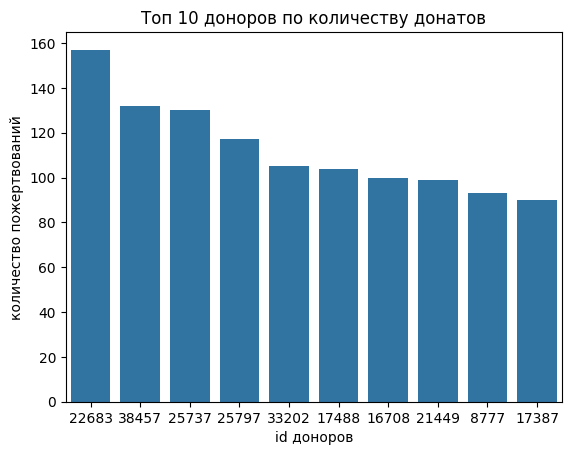

In [967]:
sns.barplot(data=top_quantity, x="id доноров", y="количество пожертвований",
            order=top_quantity['id доноров']).set_title('Топ 10 доноров по количеству донатов')

Посмотрим на действия донора-лидера по количеству донатов:

In [968]:
orders_22683 = orders[orders['user_id'] == 22683][['user_id','action_datetimeutc', 'total_price',
                                                   'product_name', 'quantity', 'order_status']]
orders_22683.sort_values('action_datetimeutc')

,user_id,action_datetimeutc,total_price,product_name,quantity,order_status
19207,22683,2021-01-13 00:00:00,200,На уставную деятельность,1,Paid
19212,22683,2021-01-30 00:00:00,200,На уставную деятельность,1,Paid
19209,22683,2021-02-17 00:00:00,200,На уставную деятельность,1,Paid
19210,22683,2021-02-26 00:00:00,200,На уставную деятельность,1,Paid
19205,22683,2021-04-01 00:00:00,400,На уставную деятельность,1,Paid
...,...,...,...,...,...,...
19495,22683,2023-12-12 09:29:00,300,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
19497,22683,2024-01-06 13:49:00,300,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
19496,22683,2024-01-06 13:53:00,300,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
19498,22683,2024-01-23 08:38:00,110,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid


In [969]:
channels[channels['user_id'] == 22683].groupby('user_action').agg(count=('action_date', 'count')).sort_values('count', ascending=False).head(10)

,count
user_action,
Просмотр “Дети”,955
Переход на сайт,180
Оформление заказа в операции Заказ - Создание неавторизованным,152
Изменение статуса заказа в операции Заказ - Смена статуса.,151
Спасибо за разовое пожертвование (повторные),75
Спасибо за разовое пожертвование (повторные) Отправка,75
Просмотр продукта в операции 'Просмотр продукта',37
Добавление продукта в список в операции 'Добавление в список — Просмотренные продукты',37
Клик — пожертвование 300р,12


Донор-лидер по количеству донатов тоже жертвует деньги выборочно определенным детям.

**Топ доноров по сроку жизни в фонде:**

In [970]:
oldest_donors = rfm[['id', 'period']].sort_values('period', ascending=False).head(10).reset_index()
oldest_donors = oldest_donors.rename(columns={'id': 'id доноров', 'period':'период жизни'})
oldest_donors

,index,id доноров,период жизни
0,1238,16708,1168.483333
1,594,13001,1167.815278
2,4619,24852,1166.188194
3,3633,22683,1161.240972
4,4634,24888,1160.536111
5,4542,24696,1159.536806
6,4589,24802,1159.333333
7,1340,17101,1158.679167
8,2800,20672,1158.474306
9,3769,23017,1157.488194


Text(0.5, 1.0, 'Топ 10 доноров по сроку жизни в фонде')

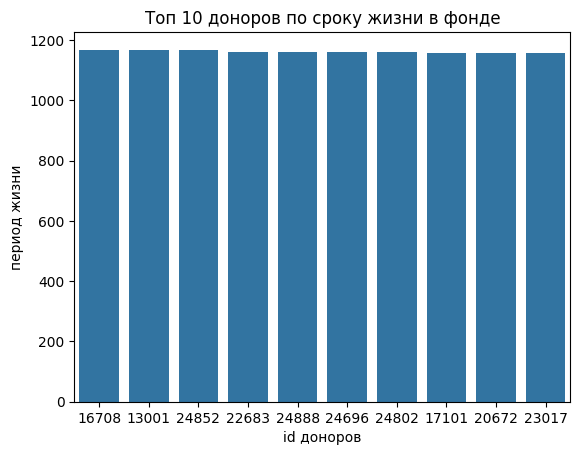

In [971]:
sns.barplot(data=oldest_donors, x="id доноров", y="период жизни",
            order=oldest_donors['id доноров']).set_title('Топ 10 доноров по сроку жизни в фонде')

In [972]:
orders_16708 = orders[orders['user_id'] == 16708][['user_id','action_datetimeutc', 'total_price',
                                                   'product_name', 'quantity', 'order_status']]
orders_16708.sort_values('action_datetimeutc')

,user_id,action_datetimeutc,total_price,product_name,quantity,order_status
5713,16708,2021-01-02 00:00:00,100,На уставную деятельность,1,Paid
5718,16708,2021-01-10 00:00:00,100,На уставную деятельность,1,Paid
5714,16708,2021-01-14 00:00:00,100,На уставную деятельность,1,Paid
5715,16708,2021-01-21 00:00:00,100,На уставную деятельность,1,Paid
5723,16708,2021-02-02 00:00:00,100,На уставную деятельность,1,Paid
...,...,...,...,...,...,...
5893,16708,2024-02-02 13:57:00,200,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
5895,16708,2024-02-14 11:36:00,200,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
5896,16708,2024-02-20 16:08:00,100,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid
5897,16708,2024-03-02 13:57:00,200,Пожертвование Благотворительный фонд «АиФ. Доб...,1,Paid


Донор-старожил фонда подписан на ежемесечное пожертвование с начала 2021 года. По сей день он является донором.

Несмотря на то, что он уже 4-й год делает пожертвования, он не вошел в топ 10 доноров по сумме донатов и по количеству пожертований.

## Выводы и рекомендации для заказчика

- Исторические и новые доноры:
  - Количество всех доноров: 23820. Из них 7343 исторические (самые давние доноры фонда), 16477 новые.
  - На 2024 год больше всего пожертований делают новые доноры.
  - Рекуррентов больше среди исторических клиентов. Подписки на ежемесячные пожертвования приносят большую сумму денег фонду, поэтому необходимо активно мотивировать новых клиентов оформить подписки.
- Каналы привлечения:
  - Больше всего клиентов пришли через официальный сайт фонда. Исторические доноры также пришли через сайт. Позже фонд контактирует с донорами через email.
  - Эффективность каналов с каждым годом увеличивается.
Самое большое количество касаний было в 3 квартале 2023 года.
- Портрет типичного пользователя:
  - пол - женский
  - регион - Вена
  - не рекуррент
  - подписан на email рассылку
  - канал привлечения - официальный сайт
  - среднее количество пожертвований - 3
  - средний чек 743 рубля.
- RFM - анализ.

Разделили доноров на 8 сегментов по RFM признакам (Recency — давность. Frequency — частота. Monetary — деньги)

|Сегмент|Тип клиентов|Стратегия|
|:--|:--|:--|
|333|**Ключевые**|**нужно установить с ними близкий контакт:**|
||-делали пожертвования недавно|- отправлять благодарственные письма|
||-часто обращаются|- учредить награду для крупных доноров|
||-много тратят|- отправлять счастливые истории на email|
|332, 331, 322|**Лояльные**|**мотивировать тратить больше**|
||-заказывали недавно|- попробовать добавить в вариантах суммы |
||-тратят часто или средне|пожертвований и большие суммы. |
||-тратят не очень много|Например: 500, 1500, 5000.|
||-рекурренты|- создать ранговую систему по сумме пожертвований:|
|||Например: неравнодушный (до 1000 руб), заботливый (до 3000 руб), герой (от 10000) итд|
|323, 233, 223|**Крупные**|**увеличить частоту пожертвований**|
||-заказывают нерегулярно|можно создать для них специальную рассылку с информацией|
||-тратят много|о том, что для закрытия сбора ребенка не хватает сколько-то средств.|
|232, 231, 222, 221, 212, 211|**Неактивные:** |**нужно возвращать их**|
||-давно не обращались|- создать для них специальную рассылку, экспериментировать с форматами|
|||цель: снова вызвать интерес этих доноров|
|213, 133, 123, 113|**Крупные неактивные**|**нужно возвращать их**|
||-заказывали давно|возможно, они начали донатить в другой фонд|
||-тратят много|-нужно провести анализ конкурентов|
||-тратят много|и пересмотреть стратегию продвижения|
|321, 313, 312, 311	|**Новые**: |**мотивировать их остаться и становиться постоянным донором**|
||-недавно заказывали впервые|- также может сработать ранговая система|
|||-сразу присваивать ранг "неравнодушный" и отправить письмо|
|||о том, что если пожертвовать еще 1000, можно перейти на следуюший ранг.|
|132, 131|**Почти потерянные:** |**нужно удержать их**|
||-в прошлом много заказывали, но давно не обращались|нужно показывать им результат работы фонда.|
|||- создать специальную рассылку|
|||с результатами работы.|
|112, 121, 122, 111|**Ушедшие**|**нужно возвращать их**|
||-заказывали немного|- отправить персонализированное письмо на почту|
||-давно не обращались|с опросом: почему давно не обращались?что не понравилось?|
|||После поработать над продуктов и пригласить снова стать донором.|

- Анализ активности пользователей показал, что в некоторых днях были всплески активности. 22 февраля 2022 года на сайт зашло 126 уникальных пользвателей по промо для Тимура Батулина . Стоит посмотреть, какие именно действия были в этот день для этого ребенка.
- Больше всего денег отправляют на уставню деятельность. Вторым крупным каналом по привлечению денег является ежемесечная подписка "хочу помочь".
- Выделили по топ-10 доноров-лидеров по сумме донатов, по количеству донатов и по продожительности жизни в фонде.
  - Лидеры по сумме и количеству донатов не подписаны на ежемесячное пожертвование. Они много времени тратят на странице сайта с детьми и выборочно донатят большие суммы денег. Стоит посмотреть на страницы детей, кому жертвовали эти доноры и попытаться узнать, что именно побудило их отправить деньги именно им. Нужно качественно оформлять карточки детей.
  - Лидеры по продолжительности жизни с фондом подписаны на ежемесячные пожертвования. Но они не входят в топ по количеству и сумме донатов.